## 1.Setting Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from scipy.stats import norm

pd.options.display.max_columns = None
pd.options.display.max_rows = None



## 2.Importing

In [2]:
df_telecom = pd.read_csv('telecom_churn_data.csv')

## 3.Examining the Data

In [3]:
df_telecom.shape

(99999, 226)

In [4]:
df_telecom.describe([0.25,0.50,0.75,0.80,0.85,0.90,0.95,0.99],include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

Looking at the statistics above, the following can be observed:

    There are a number of columns that have single value, hence that should be deleted
    There are a number of columns with outliers that should be treated but with caution
    There are a number of columns with missing values that should be furhter investigated and imputed or deleted

## 4) Data Cleaning 

###          4.1) Handling Missing Values

In [5]:
null_columns = round(100*(df_telecom.isnull().sum()/len(df_telecom.index)), 2)
null_columns = null_columns[null_columns>0]
null_columns.sort_values(inplace=True, ascending=False)
print ('Total Columns with missing values = ',len(null_columns))
null_columns

Total Columns with missing values =  166


count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
av_rech_amt_data_6          74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
arpu_3g_6                   74.85
arpu_3g_7                   74.43
count_rech_3g_7             74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
fb_user_7                   74.43
total_rech_data_7           74.43
total_rech_data_9           74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
night_pck_user_9            74.08
av_rech_amt_data_9          74.08
arpu_2g_9                   74.08
arpu_3g_9     

####  Dropping date columns since we will not be using them in our analysis . The monthly breakup is already available

In [6]:
date_columns = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_9','date_of_last_rech_data_8',
                'date_of_last_rech_9','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6',
                'last_date_of_month_9','last_date_of_month_8','last_date_of_month_7','last_date_of_month_6']
df_telecom = df_telecom.drop(date_columns , axis = 1)

In [7]:
#  THESE COLUMNS HAVE HIGH MISSING VALUES.THEY REPEAT FOR ALL 4 MONTHS WE EXAMINE THE DATA TO SEE WHAT TO KEEP. 
# 40 COLUMNS IN ALL. 10 FOR EACH MONTH. WE HAVE ALREADY DROPPED DATE COLUMNS ******
# we will do a preliminary analysis and decide to drop or keep the columns
# will be dropped / imputed for all 4 months

count_rech_3g_6             74.85 - DROP 
fb_user_6                   74.85 - Impute with 3 a new category  
date_of_last_rech_data_6    74.85 - (DROPPED)  
count_rech_2g_6             74.85 - DROP  
night_pck_user_6            74.85 - DROP max 700 users use this hence dropping witll not reliably influence model. 
av_rech_amt_data_6          74.85 - KEEP revenue imputing with 0 
total_rech_data_6           74.85 - KEEP count imputing with 0 
arpu_2g_6                   74.85 - DROP data available in other columns like mou 
max_rech_data_6             74.85 - DROP 
arpu_3g_6                   74.85 - DROP data available in other columns like mou


In [8]:
internet_columns = ['count_rech_3g_6','night_pck_user_6','max_rech_data_6','count_rech_2g_6',
                'count_rech_3g_7','night_pck_user_7','max_rech_data_7','count_rech_2g_7',
                'count_rech_3g_8','night_pck_user_8','max_rech_data_8','count_rech_2g_8',
                'count_rech_3g_9','night_pck_user_9','max_rech_data_9','count_rech_2g_9',
                'arpu_2g_6','arpu_3g_6','arpu_2g_7','arpu_3g_7' ,
                'arpu_2g_8','arpu_3g_8','arpu_2g_9','arpu_3g_9']

df_telecom = df_telecom.drop(internet_columns , axis = 1)



In [9]:
# DROPPING ID AND MOBILE NUMBER
df_telecom = df_telecom.drop(['mobile_number','circle_id'] , axis = 1)

#### Imputing some columns with high missing values with zero

In [10]:
# imputing with 0
# Since they are amount value, impuring with 0 means not recharging 

impute_zero_columns = ['av_rech_amt_data_6','total_rech_data_6',
                'av_rech_amt_data_7','total_rech_data_7',
                'av_rech_amt_data_8','total_rech_data_8',
                'av_rech_amt_data_9','total_rech_data_9'
                ]

for col in impute_zero_columns:
    df_telecom[col].fillna(0,inplace=True)
# 
# Identified these columns as categorial variable and missing value is imputed with 3 as a new category
impute_fb_columns = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9']   

for col in impute_fb_columns:
    df_telecom[col].fillna(3,inplace=True)

df_telecom.shape


(99999, 188)

####  Imputing the columns with lower percentage of missing values with median of those columns

In [11]:
#         1) Most of them have around 3.5%-5%  missing 
#         2) Numeric columns recording MOU ie minutes of usage
#         3) There are 29 columns repeated across all the 4 months 116 columns in all.
#         4) 9th month has around 7%. those columns will not be considered for the modelling. 

std_og_t2f_mou_6             3.94
onnet_mou_6                  3.94
loc_og_t2t_mou_6             3.94
roam_ic_mou_6                3.94
std_og_t2m_mou_6             3.94
roam_og_mou_6                3.94
loc_og_t2c_mou_6             3.94
std_og_t2t_mou_6             3.94
offnet_mou_6                 3.94
loc_og_t2f_mou_6             3.94
loc_og_mou_6                 3.94
loc_og_t2m_mou_6             3.94
loc_ic_t2f_mou_6             3.94
std_og_t2c_mou_6             3.94
og_others_6                  3.94
std_ic_t2m_mou_6             3.94
std_ic_t2t_mou_6             3.94
std_ic_t2o_mou_6             3.94
loc_ic_mou_6                 3.94
std_ic_mou_6                 3.94
loc_ic_t2m_mou_6             3.94
spl_ic_mou_6                 3.94
std_ic_t2f_mou_6             3.94
loc_ic_t2t_mou_6             3.94
isd_ic_mou_6                 3.94
spl_og_mou_6                 3.94
ic_others_6                  3.94
isd_og_mou_6                 3.94
std_og_mou_6                 3.94


In [12]:
null_columns = round(100*(df_telecom.isnull().sum()/len(df_telecom.index)), 2)
null_columns = null_columns[null_columns>0]
null_columns.sort_values(inplace=True, ascending=False)
print ('Total Columns with missing values = ',len(null_columns))

Total Columns with missing values =  119


In [13]:
MOU_COLUMNS_TO_IMPUTE_6 = ['std_og_t2f_mou_6','onnet_mou_6','loc_og_t2t_mou_6','roam_ic_mou_6','std_og_t2m_mou_6',
                         'roam_og_mou_6', 'loc_og_t2c_mou_6', 'std_og_t2t_mou_6' , 'offnet_mou_6' , 'loc_og_t2f_mou_6',
                         'loc_og_mou_6', 'loc_og_t2m_mou_6' , 'loc_ic_t2f_mou_6' , 'std_og_t2c_mou_6' ,'og_others_6',
                         'std_ic_t2m_mou_6' , 'std_ic_t2t_mou_6' , 'std_ic_t2o_mou_6' ,'loc_ic_mou_6' ,'std_ic_mou_6',
                         'loc_ic_t2m_mou_6' , 'spl_ic_mou_6' , 'std_ic_t2f_mou_6' , 'loc_ic_t2t_mou_6' , 'isd_ic_mou_6',
                         'spl_og_mou_6' ,'ic_others_6', 'isd_og_mou_6' ,'std_og_mou_6']

for col in MOU_COLUMNS_TO_IMPUTE_6:
    df_telecom[col].fillna(df_telecom[col].median(),inplace=True)
    
MOU_COLUMNS_TO_IMPUTE_7 = ['std_og_t2f_mou_7','onnet_mou_7','loc_og_t2t_mou_7','roam_ic_mou_7','std_og_t2m_mou_7',
                         'roam_og_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7' , 'offnet_mou_7' , 'loc_og_t2f_mou_7',
                         'loc_og_mou_7', 'loc_og_t2m_mou_7' , 'loc_ic_t2f_mou_7' , 'std_og_t2c_mou_7' ,'og_others_7',
                         'std_ic_t2m_mou_7' , 'std_ic_t2t_mou_7' , 'std_ic_t2o_mou_7' ,'loc_ic_mou_7' ,'std_ic_mou_7',
                         'loc_ic_t2m_mou_7' , 'spl_ic_mou_7' , 'std_ic_t2f_mou_7' , 'loc_ic_t2t_mou_7' , 'isd_ic_mou_7',
                         'spl_og_mou_7' ,'ic_others_7', 'isd_og_mou_7' ,'std_og_mou_7']

for col in MOU_COLUMNS_TO_IMPUTE_7:
    df_telecom[col].fillna(df_telecom[col].median(),inplace=True)
    
MOU_COLUMNS_TO_IMPUTE_8 = ['std_og_t2f_mou_8','onnet_mou_8','loc_og_t2t_mou_8','roam_ic_mou_8','std_og_t2m_mou_8',
                         'roam_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8' , 'offnet_mou_8' , 'loc_og_t2f_mou_8',
                         'loc_og_mou_8', 'loc_og_t2m_mou_8' , 'loc_ic_t2f_mou_8' , 'std_og_t2c_mou_8' ,'og_others_8',
                         'std_ic_t2m_mou_8' , 'std_ic_t2t_mou_8' , 'std_ic_t2o_mou_8' ,'loc_ic_mou_8' ,'std_ic_mou_8',
                         'loc_ic_t2m_mou_8' , 'spl_ic_mou_8' , 'std_ic_t2f_mou_8' , 'loc_ic_t2t_mou_8' , 'isd_ic_mou_8',
                         'spl_og_mou_8' ,'ic_others_8', 'isd_og_mou_8' ,'std_og_mou_8']

for col in MOU_COLUMNS_TO_IMPUTE_8:
    df_telecom[col].fillna(df_telecom[col].median(),inplace=True)    
    
MOU_COLUMNS_TO_IMPUTE_9 = ['std_og_t2f_mou_9','onnet_mou_9','loc_og_t2t_mou_9','roam_ic_mou_9','std_og_t2m_mou_9',
                         'roam_og_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2t_mou_9' , 'offnet_mou_9' , 'loc_og_t2f_mou_9',
                         'loc_og_mou_9', 'loc_og_t2m_mou_9' , 'loc_ic_t2f_mou_9' , 'std_og_t2c_mou_9' ,'og_others_9',
                         'std_ic_t2m_mou_9' , 'std_ic_t2t_mou_9' , 'std_ic_t2o_mou_9' ,'loc_ic_mou_9' ,'std_ic_mou_9',
                         'loc_ic_t2m_mou_9' , 'spl_ic_mou_9' , 'std_ic_t2f_mou_9' , 'loc_ic_t2t_mou_9' , 'isd_ic_mou_9',
                         'spl_og_mou_9' ,'ic_others_9', 'isd_og_mou_9' ,'std_og_mou_9']

for col in MOU_COLUMNS_TO_IMPUTE_9:
    df_telecom[col].fillna(df_telecom[col].median(),inplace=True)    
    

In [14]:
null_columns = round(100*(df_telecom.isnull().sum()/len(df_telecom.index)), 2)
null_columns = null_columns[null_columns>0]
null_columns.sort_values(inplace=True, ascending=False)
print ('Total Columns with missing values = ',len(null_columns))
null_columns

Total Columns with missing values =  3


loc_ic_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_og_t2o_mou    1.02
dtype: float64

#### Using the imputer for a few columns

In [15]:
# Columns to imput
remaining_cols= ['loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou']



# THIS CAN BE USED FOR INTERATIVE IMPUTER

# from sklearn.experimental import enable_iterative_imputer  
# from sklearn.impute import IterativeImputer
#imp = IterativeImputer(random_state=100,missing_values=np.nan, sample_posterior=False, initial_strategy='median')
#df_telecom[df_telecom.columns] = pd.DataFrame(imp.fit_transform(df_telecom[df_telecom.columns]), columns=df_telecom.columns)

# Since the iterative imputer takes. Have added less columns since it takes lots of time otherwise       
for col in remaining_cols:
    df_telecom[col].fillna(df_telecom[col].median(),inplace=True)        


In [16]:
null_columns = round(100*(df_telecom.isnull().sum()/len(df_telecom.index)), 2)
null_columns = null_columns[null_columns>0]
null_columns.sort_values(inplace=True, ascending=False)
print ('Total Columns with missing values = ',len(null_columns))
null_columns

Total Columns with missing values =  0


Series([], dtype: float64)

### 4.2. Identifying and Removing data columns with single unique value¶

In [17]:
# Getting columns with single unique value and check if there is any missing value
single_value_columns=[]
for col in df_telecom.columns:
    if df_telecom[col].nunique()==1:
        single_value_columns.append(col)
print('Total variables {} to remove '.format(len(single_value_columns)))

# Checking single value variables missing values
print(df_telecom[single_value_columns].isnull().sum())
# Has single value and some missing values. So we will remove them as imputing will also result in single value

# Removing single value columns
df_telecom=df_telecom.drop(columns=single_value_columns,axis=1)

Total variables 11 to remove 
loc_og_t2o_mou      0
std_og_t2o_mou      0
loc_ic_t2o_mou      0
std_og_t2c_mou_6    0
std_og_t2c_mou_7    0
std_og_t2c_mou_8    0
std_og_t2c_mou_9    0
std_ic_t2o_mou_6    0
std_ic_t2o_mou_7    0
std_ic_t2o_mou_8    0
std_ic_t2o_mou_9    0
dtype: int64


In [18]:
df_telecom.shape

(99999, 177)

#### Finding probable categorical columns

In [19]:
# Facebook seems categorical and has 3 values since it was imputed with 3

# monthly packs have many values can be made 0 and 1 if packs taken since freqencies are very low beyond 1

single_value_vars2=[]
for col in df_telecom.columns:
    if df_telecom[col].nunique()<= 15:
        single_value_vars2.append(col)
print(single_value_vars2)
print('Total variables {} to remove '.format(len(single_value_vars2)))

# Checking two unique value variables missing values
print(df_telecom[single_value_vars2].nunique())

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
Total variables 12 to remove 
monthly_2g_6     5
monthly_2g_7     6
monthly_2g_8     6
monthly_2g_9     5
monthly_3g_6    12
monthly_3g_7    15
monthly_3g_8    12
monthly_3g_9    11
fb_user_6        3
fb_user_7        3
fb_user_8        3
fb_user_9        3
dtype: int64


In [20]:
# Extracting column types
cat_columns =['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
# change columns types
df_telecom[cat_columns] = df_telecom[cat_columns].apply(lambda column: column.astype("category"), axis=0)

In [21]:
# converting categories with infrequent categories into 1 . here 1 means subscribed 0 means did not subscribe
        
pack_columns=['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9'] 

for col in pack_columns:    
    df_telecom[col] = df_telecom[col].apply(lambda x: 1 if x > 1 else x )

In [22]:
df_telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,3.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,

### 5 ) Finding high networth customers from total recharge amount for month 6,7 and data 6,7

In [23]:

df_telecom['ave_cus_rech_6_7'] = (df_telecom['total_rech_amt_6']+df_telecom['total_rech_amt_7']
                                                +df_telecom['av_rech_amt_data_6']+ df_telecom['av_rech_amt_data_7'])/2

In [24]:
df_telecom.head(2)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,ave_cus_rech_6_7
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,65.11,63.685,0.00,61.84,0.00,0.00,0.0,0.0,3.95,3.635,0.00,2.5,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.0,0.0,0.00,0.0,2.03,2.04,0.00,1.74,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,3.0,968,30.4,0.0,101.2,3.58,559.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.0,0.0,0.0,0.0,0.0,2.91,0.0,0.0,35.39,150.510,299.54,72.11,0.23,4.11,0.0,0.0,0.00,0.460,0.13,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.0,0.0,2.35,0.0,5.90,0.00,12.49,15.01,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.0,0.0,0.0,0.0,1.83,0.0,0.0,0.0,0.0,0.0,0.0,

In [25]:
df_telecom['ave_cus_rech_6_7'].describe([0,0.25,0.50,0.70,0.80,0.85,0.90,0.95,0.99],include='all')

count    99999.000000
mean       375.158217
std        422.446506
min          0.000000
0%           0.000000
25%        125.000000
50%        263.500000
70%        431.000000
80%        561.000000
85%        658.650000
90%        808.000000
95%       1075.550000
99%       1844.020000
max      37762.500000
Name: ave_cus_rech_6_7, dtype: float64

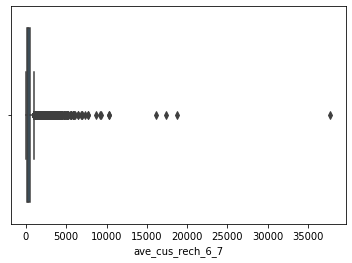

In [26]:
sns.boxplot(df_telecom['ave_cus_rech_6_7'])

### 6) Splitting High Networth Customers. Keeping the quantile values at .7

In [27]:
quantiles = pd.qcut(df_telecom['ave_cus_rech_6_7'], [0, .7, 1.], labels=["non-HVC", "HVC"])
df_telecom = df_telecom.assign(Customer_Type=quantiles.values)

In [28]:
DF_TELECOM_HVC = df_telecom[df_telecom.Customer_Type == "HVC"]

### Data Frame with only HNI customers

In [29]:
DF_TELECOM_HVC.shape

(29949, 179)

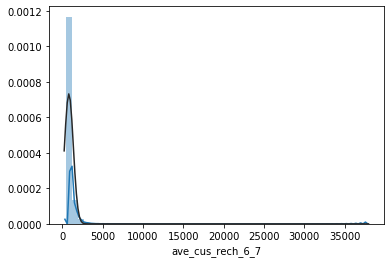

In [30]:
sns.distplot(DF_TELECOM_HVC['ave_cus_rech_6_7'] , fit=norm);

In [31]:
# Drop derived recharge columns
recharge_columns = ['total_rech_data_6',
                'total_rech_data_7','total_rech_data_8',
                'total_rech_data_9','ave_cus_rech_6_7']

DF_TELECOM_HVC = DF_TELECOM_HVC.drop(recharge_columns , axis = 1)

### 7) Calculating Churn data and churns

### Calculate the target variable. Using total ic , total outgoing and data usage for month 9. 
#### If all these are call mou and data volume is zero then we consider the person has churned. Else we  assume they are using the network

In [32]:
DF_TELECOM_HVC['DATA_usage_9'] = DF_TELECOM_HVC['vol_3g_mb_9'] + DF_TELECOM_HVC['vol_2g_mb_9']

DF_TELECOM_HVC['MOU_usage_9'] = DF_TELECOM_HVC['total_og_mou_9'] + DF_TELECOM_HVC['total_ic_mou_9']

churned = (lambda x,y: '0' if((x > 0) or (y > 0)) else '1')
DF_TELECOM_HVC['Churned']=  list(map(churned, DF_TELECOM_HVC['DATA_usage_9'],DF_TELECOM_HVC['MOU_usage_9']))


In [33]:
DF_TELECOM_HVC ['Churned'] .value_counts(),DF_TELECOM_HVC ['Churned'] .value_counts()*100/len(DF_TELECOM_HVC)

(0    27498
 1     2451
 Name: Churned, dtype: int64, 0    91.816087
 1     8.183913
 Name: Churned, dtype: float64)

**The proportion of churn data to non-churn is almost 1 to 11. So the class look imbalanced**

In [34]:
DF_TELECOM_HVC = DF_TELECOM_HVC.drop(['Customer_Type'],axis = 1)

In [35]:
churn_data = DF_TELECOM_HVC

#### Remove All 9th Month related columns

In [36]:
#Remove All 9th Month related columns
drop_cols = [col for col in churn_data.columns if '_9' in col]
print(len(drop_cols))
print(drop_cols)

churn_data.drop(drop_cols, axis=1, inplace=True)

churn_data.shape

44
['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'DATA_usage_9', 'MOU_usage_9']


(29949, 132)

### 8) Derived Parameters 

    1. Finding the difference in key indicators between month 8 and average of month 7 and 5. It can serve as important feature to find how it differs. The result of negative means losing interest to the network due to any reason. O or higher value could mean the customer is happy with the services.
    2. Calculating total Incoming(ic) and Outgoing(og) call minutes as new derived variable
    3. Calculating total 3g and 2g data usage in MB


In [37]:

churn_data['arpu_diff'] = churn_data.arpu_8 - ((churn_data.arpu_7 + churn_data.arpu_6)/2)
churn_data['total_og_mou_diff'] = churn_data.total_og_mou_8 - ((churn_data.total_og_mou_7 + churn_data.total_og_mou_6)/2)
churn_data['total_ic_mou_diff'] = churn_data.total_ic_mou_8 - ((churn_data.total_ic_mou_7 + churn_data.total_ic_mou_6)/2)
churn_data['total_rech_num_diff'] = churn_data.total_rech_num_8 - ((churn_data.total_rech_num_7 + churn_data.total_rech_num_6)/2)
churn_data['total_rech_amt_diff'] = churn_data.total_rech_amt_8 - ((churn_data.total_rech_amt_7 + churn_data.total_rech_amt_6)/2)
churn_data['max_rech_amt_diff'] = churn_data.max_rech_amt_8 - ((churn_data.max_rech_amt_7 + churn_data.max_rech_amt_6)/2)
churn_data['total_rech_data_diff'] = churn_data.av_rech_amt_data_8 - ((churn_data.av_rech_amt_data_6 + churn_data.av_rech_amt_data_7)/2)
churn_data['vol_2g_mb_diff'] = churn_data.vol_2g_mb_8 - ((churn_data.vol_2g_mb_7 + churn_data.vol_2g_mb_6)/2)
churn_data['vol_3g_mb_diff'] = churn_data.vol_3g_mb_8 - ((churn_data.vol_3g_mb_7 + churn_data.vol_3g_mb_6)/2)

churn_data['MOU_usage_6'] = churn_data['total_og_mou_6'] + churn_data['total_ic_mou_6']
churn_data['MOU_usage_7'] = churn_data['total_og_mou_7'] + churn_data['total_ic_mou_7']
churn_data['MOU_usage_8'] = churn_data['total_og_mou_8'] + churn_data['total_ic_mou_8']

churn_data['DATA_usage_6'] = churn_data['vol_3g_mb_6'] + churn_data['vol_2g_mb_6']
churn_data['DATA_usage_7'] = churn_data['vol_3g_mb_7'] + churn_data['vol_2g_mb_7']
churn_data['DATA_usage_8'] = churn_data['vol_3g_mb_8'] + churn_data['vol_2g_mb_8']



In [38]:
#Convert AON  network age in days to months 
churn_data['aon_months'] = churn_data['aon']/30
churn_data.drop('aon', axis=1, inplace=True)


###   8) EDA 

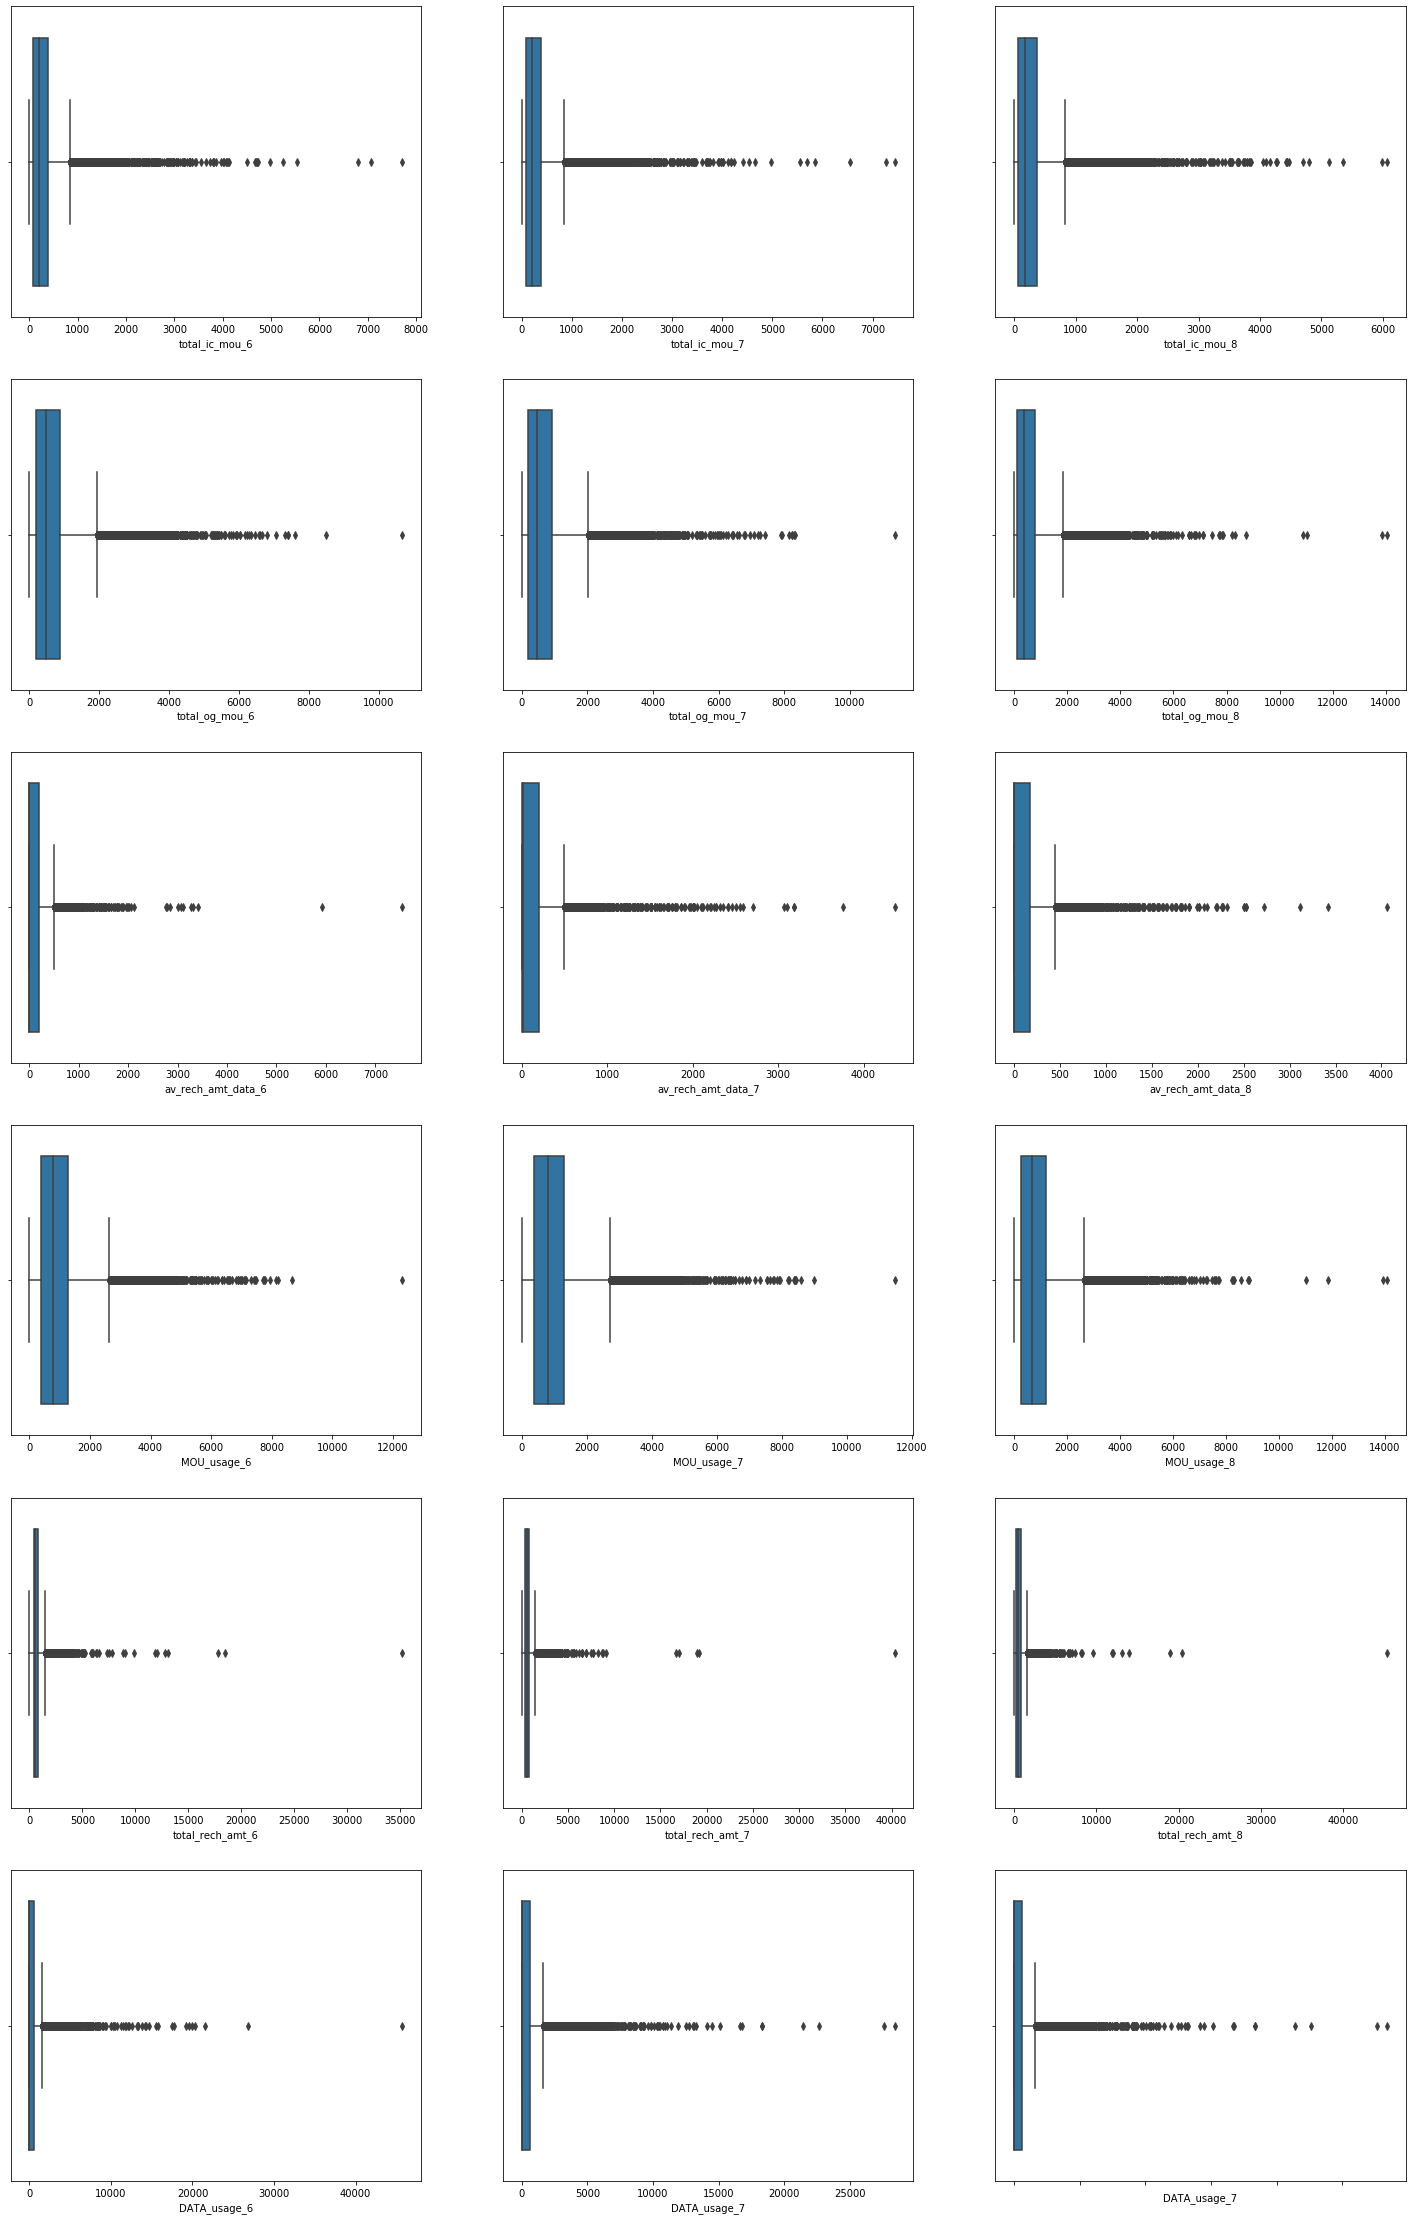

In [39]:
# UNIVARIATE ANALYSIS


fig, axes = plt.subplots(nrows = 6,ncols = 3,figsize = (25,40))
sns.boxplot(x = "total_ic_mou_6", data = churn_data, ax=axes[0][0])
sns.boxplot(x = "total_ic_mou_7", data = churn_data, ax=axes[0][1])
sns.boxplot(x = "total_ic_mou_8", data = churn_data, ax=axes[0][2])

sns.boxplot(x = "total_og_mou_6", data = churn_data, ax=axes[1][0])
sns.boxplot(x = "total_og_mou_7", data = churn_data, ax=axes[1][1])
sns.boxplot(x = "total_og_mou_8", data = churn_data, ax=axes[1][2])

sns.boxplot(x = "av_rech_amt_data_6", data = churn_data, ax=axes[2][0])
sns.boxplot(x = "av_rech_amt_data_7", data = churn_data, ax=axes[2][1])
sns.boxplot(x = "av_rech_amt_data_8", data = churn_data, ax=axes[2][2])

sns.boxplot(x = "MOU_usage_6", data = churn_data, ax=axes[3][0])
sns.boxplot(x = "MOU_usage_7", data = churn_data, ax=axes[3][1])
sns.boxplot(x = "MOU_usage_8", data = churn_data, ax=axes[3][2])

sns.boxplot(x = "total_rech_amt_6", data = churn_data, ax=axes[4][0])
sns.boxplot(x = "total_rech_amt_7", data = churn_data, ax=axes[4][1])
sns.boxplot(x = "total_rech_amt_8", data = churn_data, ax=axes[4][2])


sns.boxplot(x = "DATA_usage_6", data = churn_data, ax=axes[5][0])
sns.boxplot(x = "DATA_usage_7", data = churn_data, ax=axes[5][1])
ax = sns.boxplot(x = "DATA_usage_7", data = churn_data, ax=axes[5][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)



#### The above variables look to have some outliers

#### Looking at the distribution between churn and non-churn data

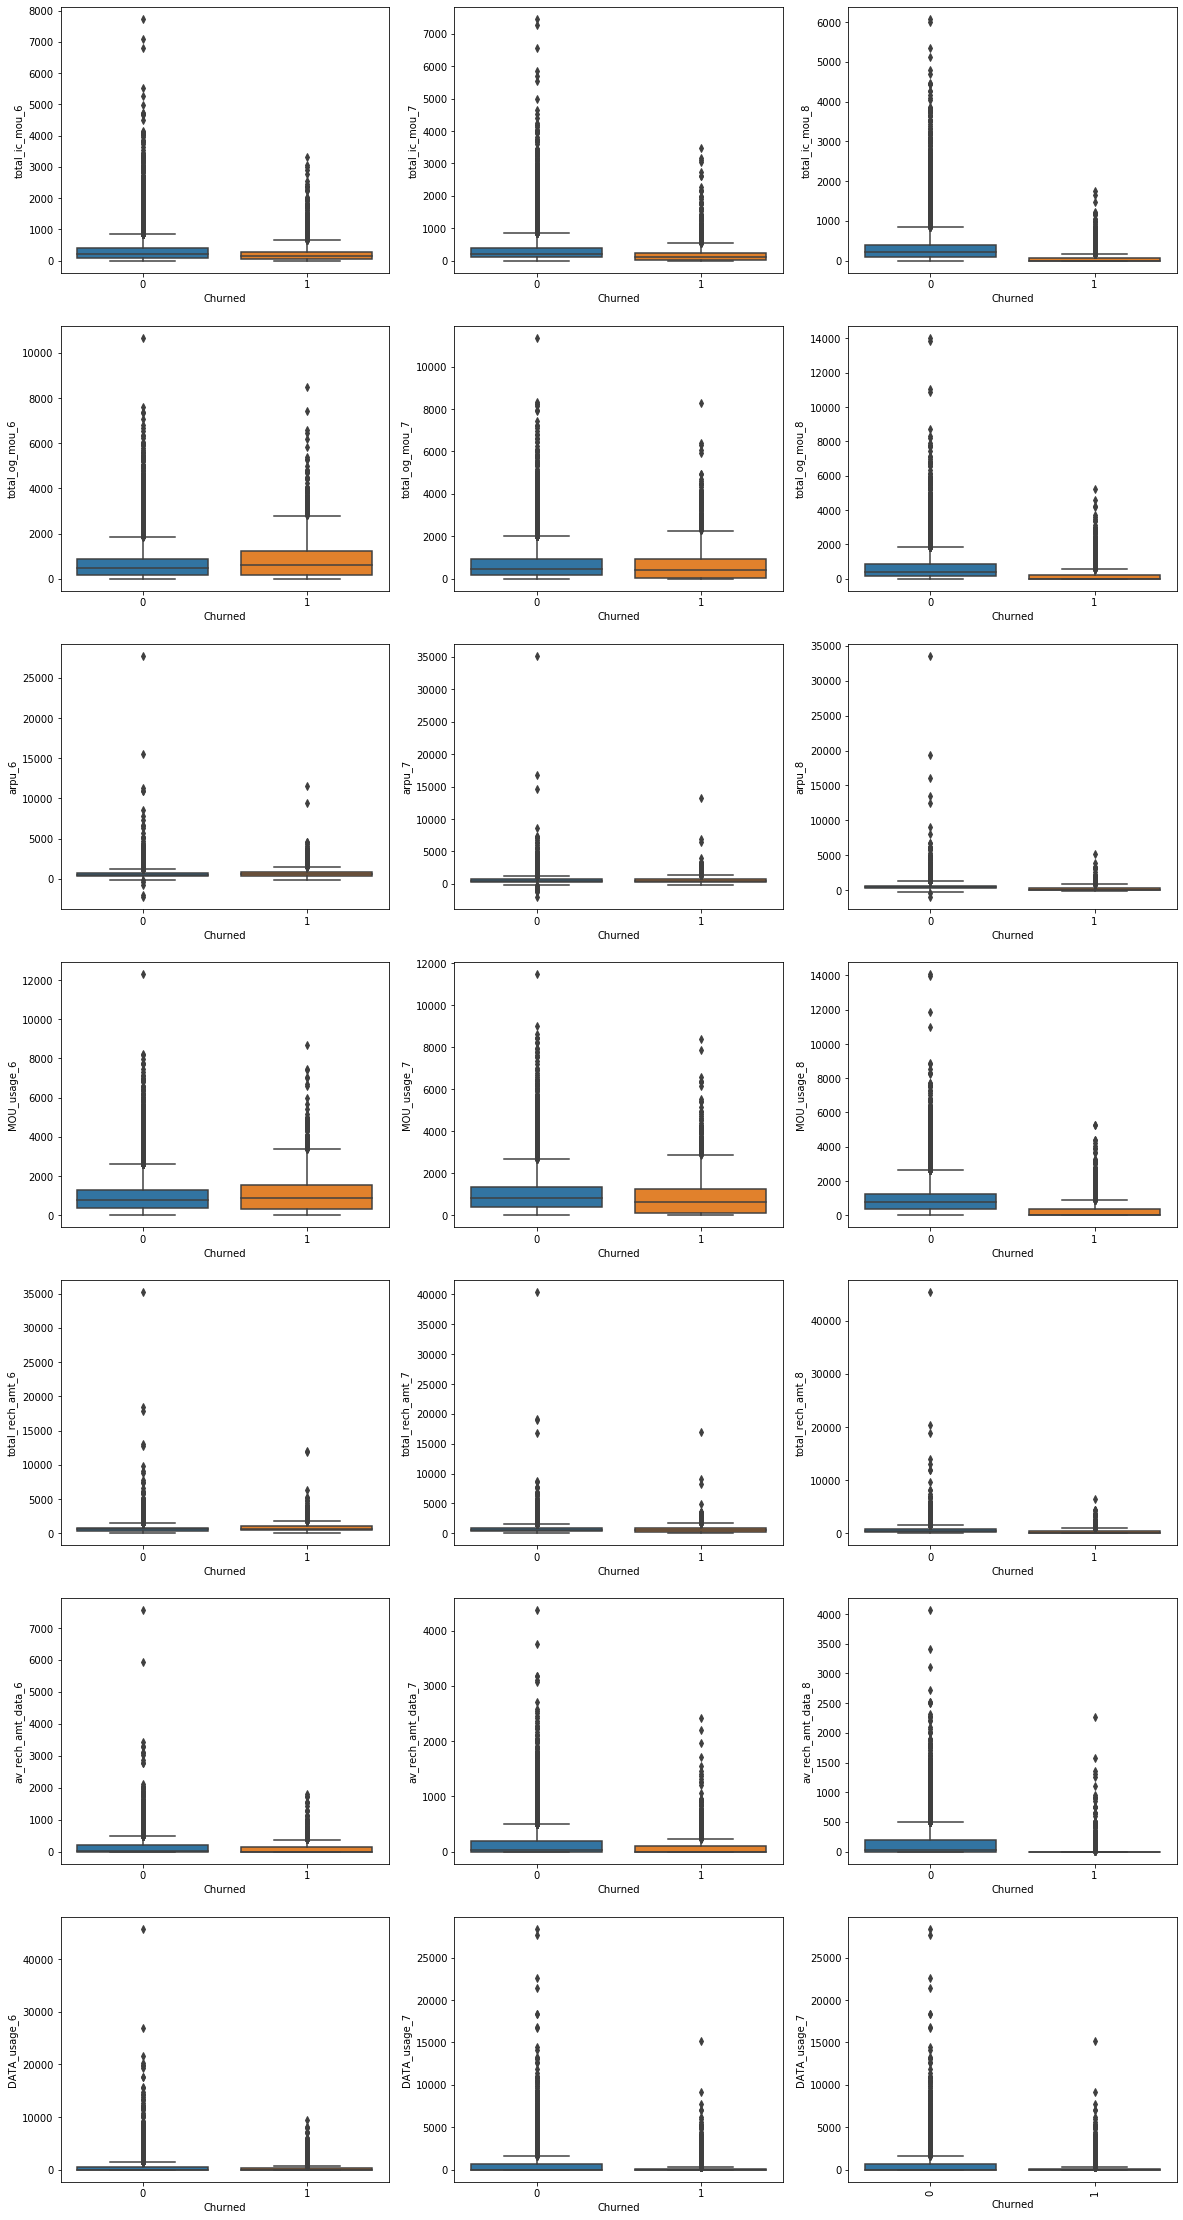

In [40]:
fig, axes = plt.subplots(nrows = 7,ncols = 3,figsize = (20,40))
sns.boxplot(y = "total_ic_mou_6",x='Churned', data = churn_data, ax=axes[0][0])
sns.boxplot(y = "total_ic_mou_7",x='Churned', data = churn_data, ax=axes[0][1])
sns.boxplot(y = "total_ic_mou_8",x='Churned', data = churn_data, ax=axes[0][2])

sns.boxplot(y = "total_og_mou_6",x='Churned', data = churn_data, ax=axes[1][0])
sns.boxplot(y = "total_og_mou_7",x='Churned', data = churn_data, ax=axes[1][1])
sns.boxplot(y = "total_og_mou_8",x='Churned', data = churn_data, ax=axes[1][2])

sns.boxplot(y = "arpu_6",x='Churned', data = churn_data, ax=axes[2][0])
sns.boxplot(y = "arpu_7",x='Churned', data = churn_data, ax=axes[2][1])
sns.boxplot(y = "arpu_8",x='Churned', data = churn_data, ax=axes[2][2])

sns.boxplot(y = "MOU_usage_6",x='Churned', data = churn_data, ax=axes[3][0])
sns.boxplot(y = "MOU_usage_7",x='Churned', data = churn_data, ax=axes[3][1])
sns.boxplot(y = "MOU_usage_8",x='Churned', data = churn_data, ax=axes[3][2])

sns.boxplot(y = "total_rech_amt_6",x='Churned', data = churn_data, ax=axes[4][0])
sns.boxplot(y = "total_rech_amt_7",x='Churned', data = churn_data, ax=axes[4][1])
sns.boxplot(y = "total_rech_amt_8",x='Churned', data = churn_data, ax=axes[4][2])

sns.boxplot(y = "av_rech_amt_data_6",x='Churned', data = churn_data, ax=axes[5][0])
sns.boxplot(y = "av_rech_amt_data_7",x='Churned', data = churn_data, ax=axes[5][1])
sns.boxplot(y = "av_rech_amt_data_8",x='Churned', data = churn_data, ax=axes[5][2])

sns.boxplot(y = "DATA_usage_6",x='Churned', data = churn_data, ax=axes[6][0])
sns.boxplot(y = "DATA_usage_7",x='Churned', data = churn_data, ax=axes[6][1])
ax = sns.boxplot(y = "DATA_usage_7",x='Churned', data = churn_data, ax=axes[6][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

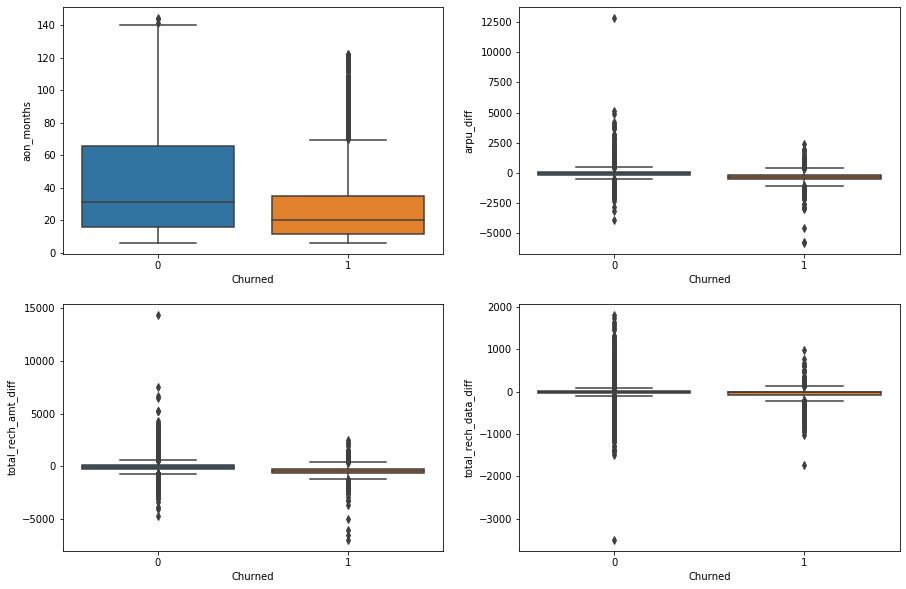

In [41]:
# Difference plots that show how revenues change between 6+7 average and 8th month

fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
sns.boxplot(x = 'Churned', y = 'aon_months',data = churn_data, ax=axes[0][0])
sns.boxplot(x = 'Churned', y = 'arpu_diff',data = churn_data, ax=axes[0][1])
sns.boxplot(x = 'Churned', y = 'total_rech_amt_diff',data = churn_data, ax=axes[1][0])
sns.boxplot(x = 'Churned', y = 'total_rech_data_diff',data = churn_data, ax=axes[1][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)


###  9)  Finding Correlations

In [42]:

#Find Highly correlated data and drop Highly Correlated Columns

churn_data['Churned'] = churn_data['Churned'].astype("int64")

cor = churn_data.corr()

cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor = cor[(cor > 0.70) | (cor < -0.70)].sort_values()
cor


std_ic_t2t_mou_8     std_ic_t2t_mou_7      0.700586
total_rech_amt_8     total_rech_amt_7      0.702042
loc_og_t2t_mou_8     loc_og_t2t_mou_6      0.702063
DATA_usage_7         vol_3g_mb_8           0.702909
jul_vbc_3g           aug_vbc_3g            0.704888
total_og_mou_6       onnet_mou_6           0.706486
loc_ic_mou_7         loc_ic_t2m_mou_8      0.706636
DATA_usage_8         vol_3g_mb_7           0.707847
loc_ic_t2m_mou_8     loc_ic_t2m_mou_6      0.708606
total_ic_mou_8       total_ic_mou_6        0.710783
std_ic_t2m_mou_8     std_ic_t2m_mou_7      0.710959
total_og_mou_7       onnet_mou_7           0.712141
loc_ic_mou_8         loc_ic_t2m_mou_7      0.712325
std_ic_t2f_mou_8     std_ic_t2f_mou_7      0.714255
std_ic_t2f_mou_7     std_ic_t2f_mou_6      0.718440
total_ic_mou_7       loc_ic_mou_6          0.718674
loc_og_mou_8         loc_og_mou_6          0.720721
offnet_mou_7         offnet_mou_6          0.721155
total_og_mou_7       offnet_mou_7          0.721756
sachet_2g_8 

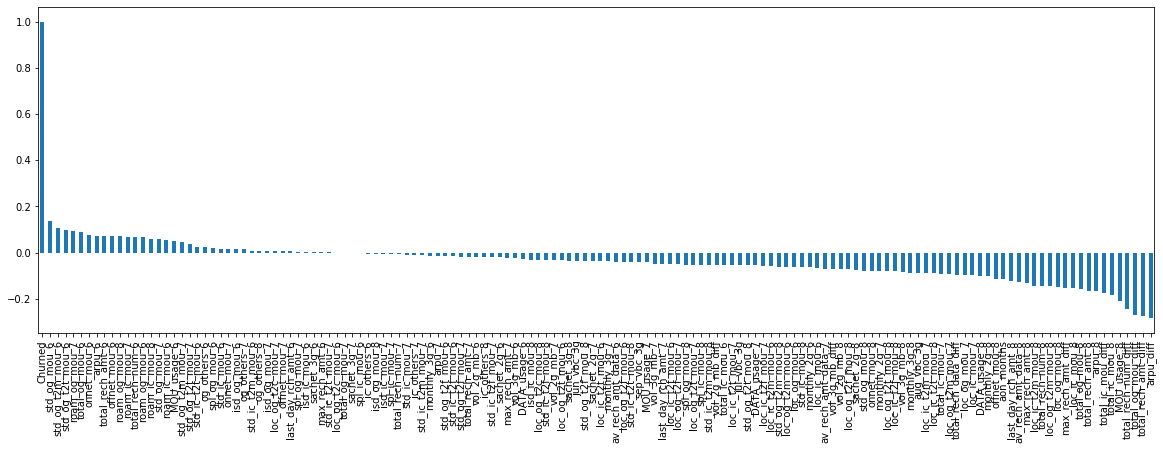

In [43]:

#Get Correlation of "Churn" with other variables
# the correlation between churn and any variable is not very high. But many variables are intercorrelated

plt.figure(figsize=(20,6))
churn_data.corr()['Churned'].sort_values(ascending = False).plot(kind='bar');

The results show that this data is highly correlated. Let us apply PCA modelling on this data First befor we move on to correlation removal for other models

In [44]:
numeric_records = churn_data.select_dtypes(include=['float64'])
others_columns =  churn_data.select_dtypes(exclude=['float64'])
print((numeric_records.columns.tolist()))

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

### 10) Function to cap outliers


In [45]:
def cap_outliers(array, k=1):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

# cap outliers in the numeric columns

churn_data[numeric_records.columns.tolist()] = churn_data[numeric_records.columns.tolist()].apply(cap_outliers, axis=0)

In [46]:
churn_data.shape

(29949, 147)

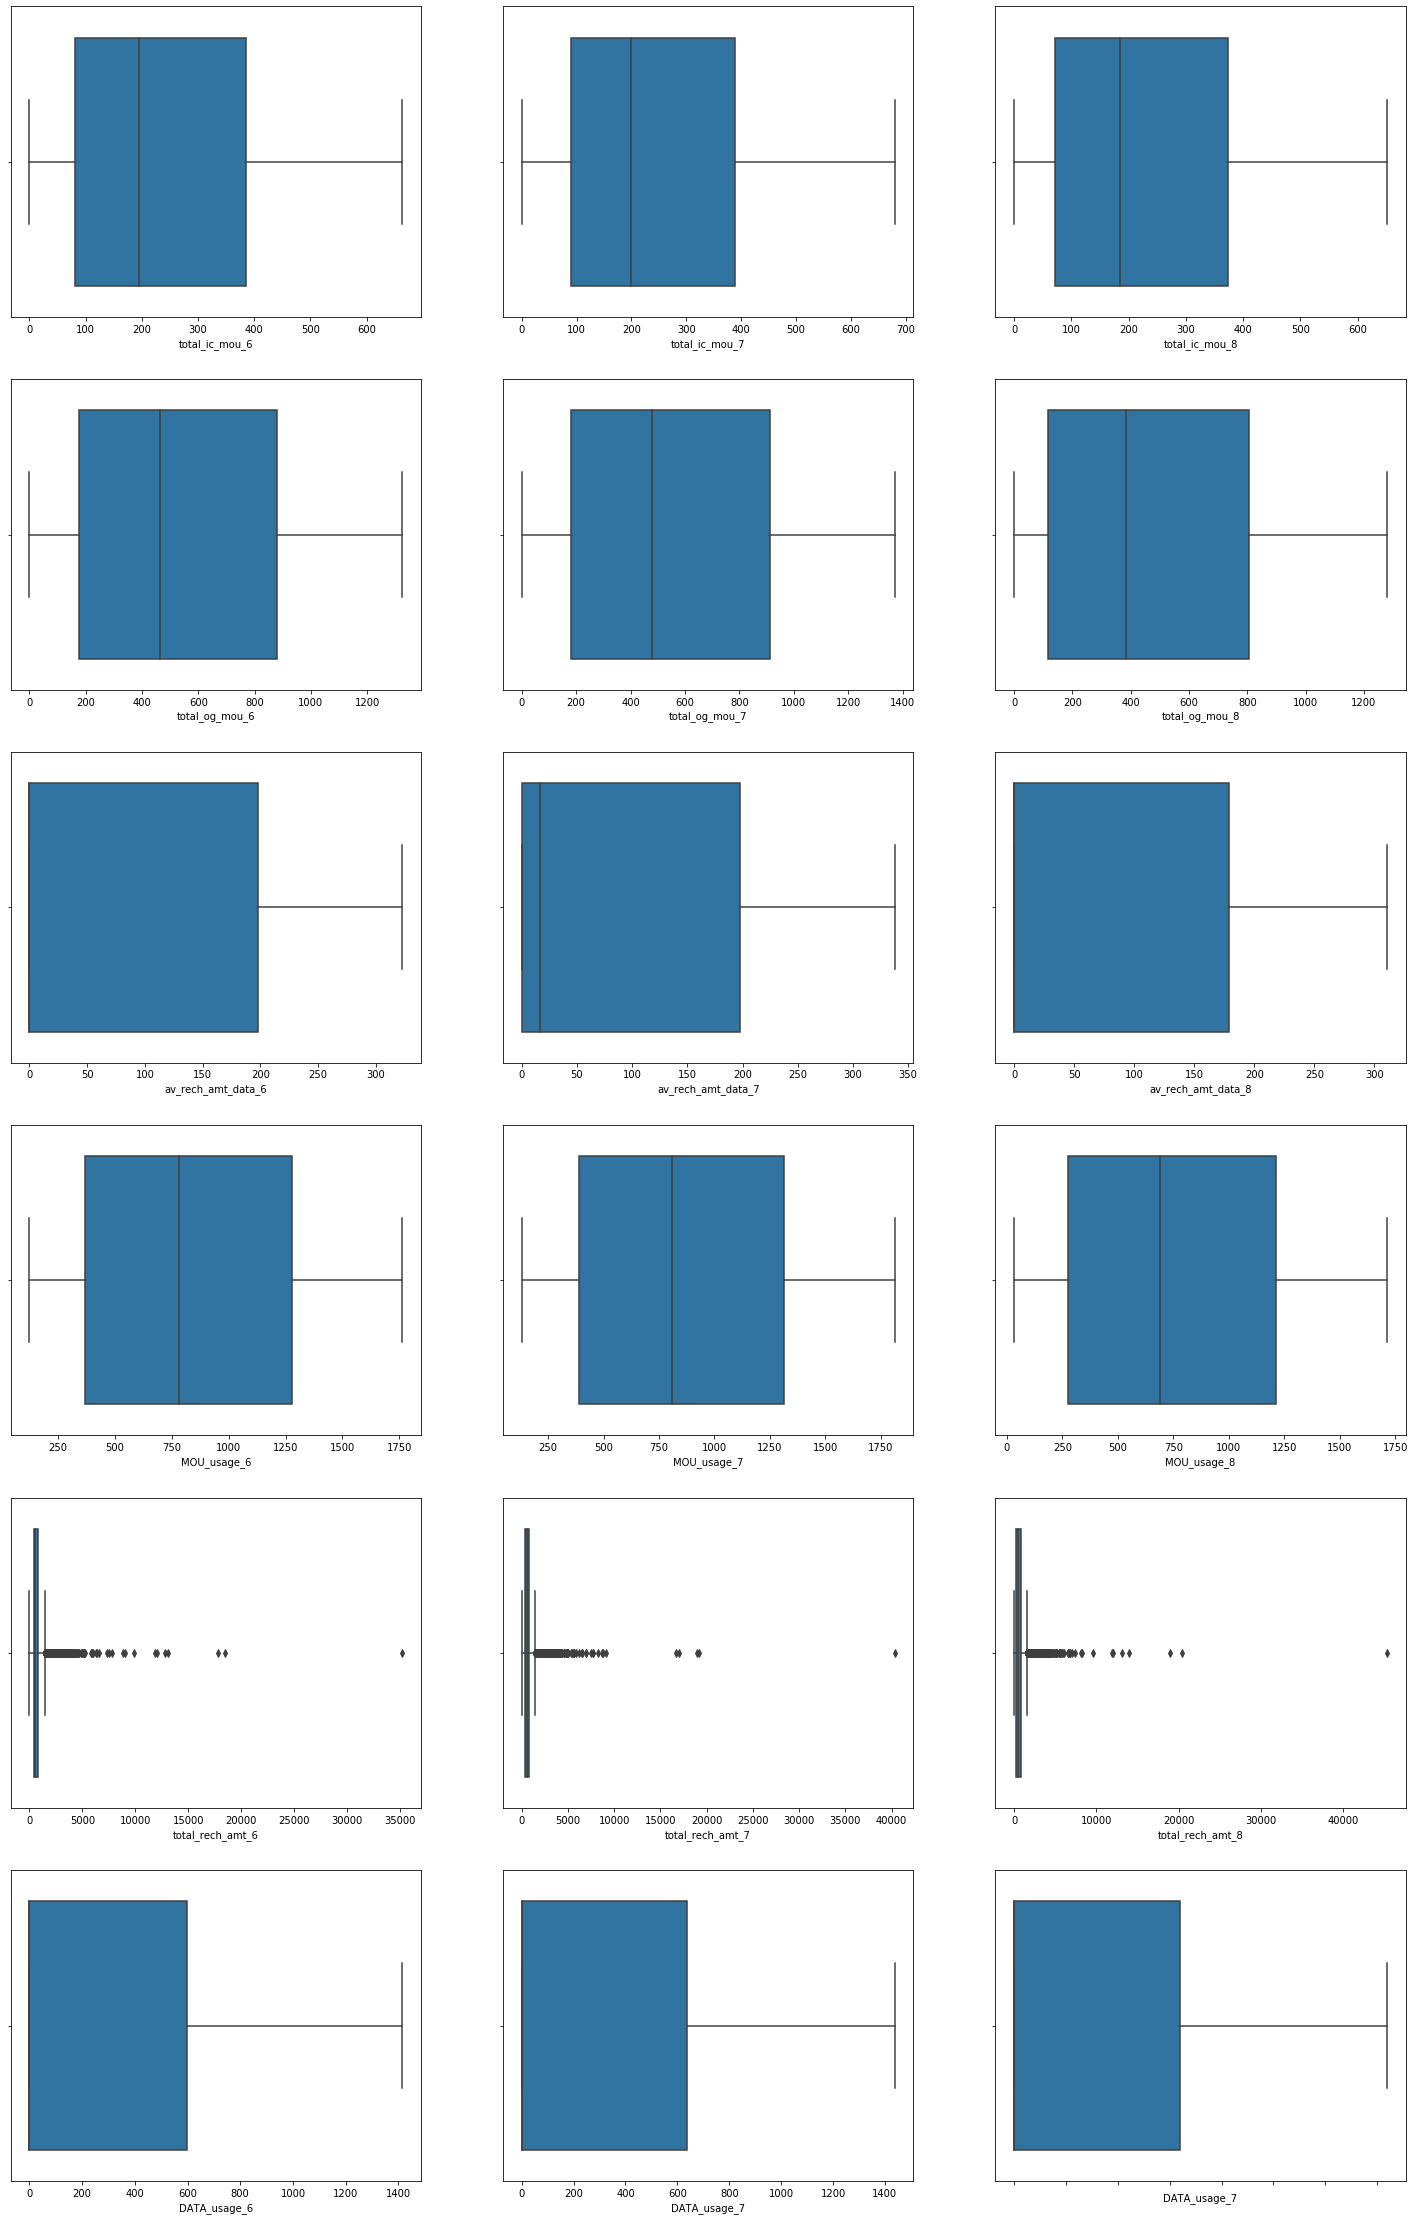

In [47]:
# Box plot values after outlier treatement

fig, axes = plt.subplots(nrows = 6,ncols = 3,figsize = (25,40))
sns.boxplot(x = "total_ic_mou_6", data = churn_data, ax=axes[0][0])
sns.boxplot(x = "total_ic_mou_7", data = churn_data, ax=axes[0][1])
sns.boxplot(x = "total_ic_mou_8", data = churn_data, ax=axes[0][2])

sns.boxplot(x = "total_og_mou_6", data = churn_data, ax=axes[1][0])
sns.boxplot(x = "total_og_mou_7", data = churn_data, ax=axes[1][1])
sns.boxplot(x = "total_og_mou_8", data = churn_data, ax=axes[1][2])

sns.boxplot(x = "av_rech_amt_data_6", data = churn_data, ax=axes[2][0])
sns.boxplot(x = "av_rech_amt_data_7", data = churn_data, ax=axes[2][1])
sns.boxplot(x = "av_rech_amt_data_8", data = churn_data, ax=axes[2][2])

sns.boxplot(x = "MOU_usage_6", data = churn_data, ax=axes[3][0])
sns.boxplot(x = "MOU_usage_7", data = churn_data, ax=axes[3][1])
sns.boxplot(x = "MOU_usage_8", data = churn_data, ax=axes[3][2])

sns.boxplot(x = "total_rech_amt_6", data = churn_data, ax=axes[4][0])
sns.boxplot(x = "total_rech_amt_7", data = churn_data, ax=axes[4][1])
sns.boxplot(x = "total_rech_amt_8", data = churn_data, ax=axes[4][2])


sns.boxplot(x = "DATA_usage_6", data = churn_data, ax=axes[5][0])
sns.boxplot(x = "DATA_usage_7", data = churn_data, ax=axes[5][1])
ax = sns.boxplot(x = "DATA_usage_7", data = churn_data, ax=axes[5][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)



Text(0.5, 1.0, 'Churn Distribution')

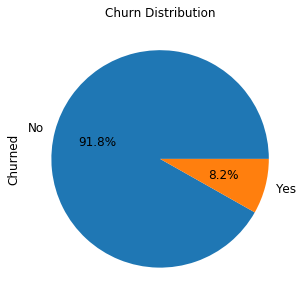

In [48]:
#Churn Distribution. 

# This is a problem with class imbalance. Hence we need to model taking this into account.
ax = (churn_data['Churned'].value_counts()*100.0 /len(churn_data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churned',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In [49]:
# Droping some columns that are correlated , derived 

columns_to_keep = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 
                   'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 
                   'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
                   'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 
                   'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 
                   'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
                   'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                   'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 
                   'og_others_6', 'og_others_7', 'og_others_8', 
                   'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 
                   'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                   'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 
                   'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 
                   'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 
                   'ic_others_6', 'ic_others_7', 'ic_others_8',
                   'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 
                   'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                   'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                   'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                   'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                   'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',  
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                   'MOU_usage_6', 'MOU_usage_7', 'MOU_usage_8', 
                   'DATA_usage_6', 'DATA_usage_7', 'DATA_usage_8', 
                   'aon_months','fb_user_6', 'fb_user_7', 'fb_user_8', 'Churned']
churn_data = churn_data[columns_to_keep]

churn_data.shape

(29949, 113)

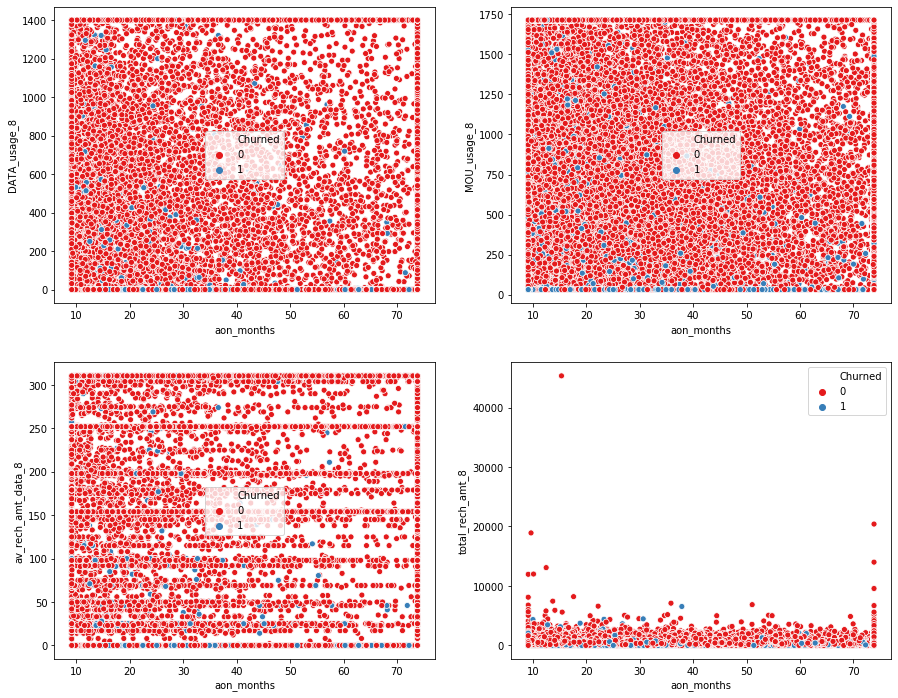

In [97]:
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.scatterplot(x = 'aon_months', y = 'DATA_usage_8',hue='Churned',data = churn_data,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'aon_months', y = 'MOU_usage_8',hue='Churned', data = churn_data,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'aon_months', y = 'av_rech_amt_data_8',hue='Churned', data= churn_data,legend='full',palette="Set1",ax=axes[1][0])
sns.scatterplot(x = 'aon_months', y = 'total_rech_amt_8',hue='Churned', data= churn_data,legend='full',palette="Set1",ax=axes[1][1])

###  11) Modelling 

### 11.1 Test Train Split

In [98]:
## Splitting into traing and test

X=churn_data.drop('Churned',axis=1)
y=churn_data.Churned

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100, stratify = y)

In [99]:
# Extracting column types
num_columns =numeric_columns = X.select_dtypes(exclude = 'category')
num_columns = num_columns.columns.tolist()

# import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Apply MinMaxScaler
scaler = StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.fit_transform(X_test[num_columns])

X_train.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,MOU_usage_6,MOU_usage_7,MOU_usage_8,DATA_usage_6,DATA_usage_7,DATA_usage_8,aon_months,fb_user_6,fb_user_7,fb_user_8,cluster_id
16167,-0.733285,-0.858097,-0.813097,-0.847989,-1.156719,-1.104649,-0.366462,-0.326604,-0.329470,-0.383405,-0.355341,-0.344661,-0.611875,-0.741490,-0.720564,-0.715458,-1.034299,-0.984490,-0.556853,-0.561851,-0.555502,-0.421605,1.402183,-0.423974,-0.735390,-1.056632,-1.005006,-0.602192,-0.602850,-0.560703,-0.645994,-0.660053,-0.618018,-0.304276,-0.299337,-0.296318,-0.756736,-0.789638,-0.723808,-0.15309,-0.157254,-0.138847,-0.590352,-0.015811,-0.599867,-0.459638,-0.057403,-0.062895,-0.587470,-0.840601,-0.825990,-0.614394,-1.115687,-1.083077,-0.563108,-0.609659,-0.611287,-0.618871,-1.163958,-1.131622,-0.489548,-0.488202,-0.473567,-0.566806,-0.629437,-0.597243,-0.342297,-0.349145,-0.337183,-0.579928,-0.695301,-0.664608,-0.495788,-0.235912,-0.290618,-0.319048,-0.328733,-0.321667,-0.277854,-0.288232,-0.28382,-1.012492,-0.561299,-0.582105,2.326579,2.288949,-0.400595,-0.338215,-0.353681,-0.353302,-0.42654,2.345307,2.451332,-0.19223,-0.186159,-0.166039,1.969800,2.436291,2.476388,0.464780,1.884506,1.420453,-1.325021,-1.334412,-1.313519,0.759989,1.161647,0.424680,-0.831304,1.0,1.0,1.0,-0.728321
3498,2.130016,1.920964,1.724630,0.205034,0.479672,0.407812,-0.366462,-0.326604,-0.329470,-0.383405,-0.355341,-0.344661,-0.433147,-0.651537,-0.643790,0.032019,-0.042161,-0.177534,-0.556853,-0.533750,-0.555502,-0.421605,0.562787,2.023880,-0.228690,-0.376562,-0.449785,2.356318,2.337446,2.508080,0.531136,0.897247,0.972876,0.182717,2.321743,-0.296318,1.926065,1.921173,1.868321,-0.15309,-0.157254,-0.138847,0.341554,-0.083178,0.687686,1.608030,-0.057403,-0.062895,-0.260931,-0.517036,-0.562719,-0.189033,-0.433481,-0.527855,-0.509596,-0.560744,-0.190420,-0.319588,-0.586131,-0.621133,2.361474,0.254167,3.947889,-0.217308,-0.596096,-0.593991,-0.342297,-0.349145,-0.337183,0.770170,-0.362205,2.360658,-0.495788,-0.235912,-0.290618,-0.319048,-0.328733,-0.321667,-0.277854,-0.288232,-0.28382,1.923465,1.160854,1.461573,-0.429816,-0.436882,-0.400595,0.578086,0.067362,0.094878,-0.42654,-0.426383,-0.407942,-0.19223,-0.186159,-0.166039,-0.537225,-0.540175,-0.518123,0.813131,-0.040553,0.078971,1.648376,0.759024,0.820018,-0.291635,-0.307242,-0.270787,0.542051,1.0,1.0,1.0,0.180303
19790,2.130016,2.147759,-0.675402,0.471253,-0.818025,-0.764154,-0.366462,-0.326604,-0.329470,-0.383405,-0.355341,-0.344661,-0.156548,-0.647607,-0.587075,-0.234228,-0.626282,-0.684488,-0.556853,-0.561851,

In [100]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA


pca = PCA(random_state=42)
pca.fit(X)
pca.explained_variance_ratio_

array([3.54065613e-01, 1.75884643e-01, 9.89548706e-02, 8.50539902e-02,
       6.61614720e-02, 4.70713101e-02, 3.41322665e-02, 2.16593495e-02,
       1.61808973e-02, 1.40052186e-02, 1.28135348e-02, 1.15359849e-02,
       1.07162119e-02, 7.14406307e-03, 5.49453602e-03, 5.17061751e-03,
       4.42312776e-03, 3.03353993e-03, 2.50985121e-03, 2.42313593e-03,
       2.09042983e-03, 1.89244810e-03, 1.82491769e-03, 1.56803853e-03,
       1.51796270e-03, 1.23869841e-03, 1.21970063e-03, 1.06368663e-03,
       8.39178589e-04, 7.16689470e-04, 6.88524532e-04, 6.55842219e-04,
       6.36848856e-04, 5.55502660e-04, 4.67981104e-04, 4.47872386e-04,
       3.96089489e-04, 3.94186550e-04, 3.11298818e-04, 2.91555724e-04,
       2.26086456e-04, 2.18647712e-04, 2.10983871e-04, 1.98820071e-04,
       1.77214785e-04, 1.71465901e-04, 1.59053404e-04, 1.51028402e-04,
       1.49318056e-04, 1.27074173e-04, 1.15076811e-04, 1.03598480e-04,
       8.63170805e-05, 8.07088534e-05, 6.95099222e-05, 5.09962762e-05,
      

Text(0, 0.5, 'Variance Ratio')

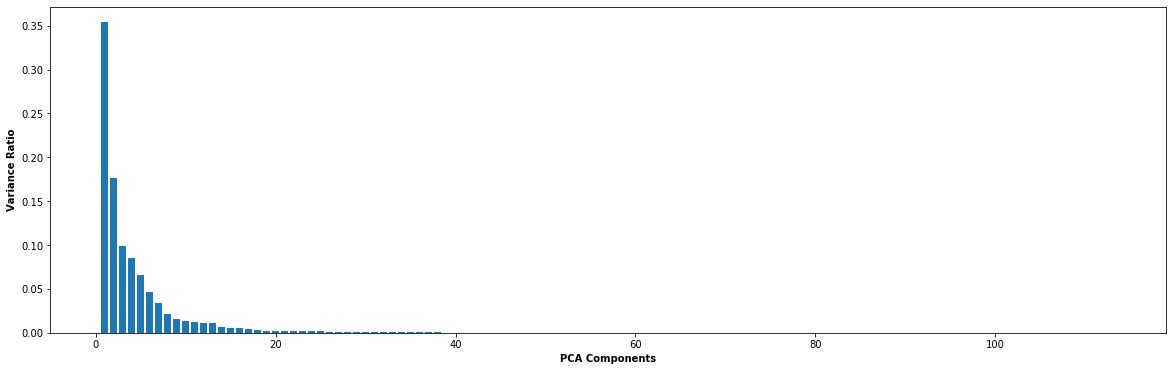

In [101]:
plt.figure(figsize=(20,6))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.palette="Set1"
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')


In [572]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.35406571, 0.52995031, 0.6289052 , 0.71395918, 0.78012067,
       0.82719199, 0.86132427, 0.88298362, 0.89916453, 0.91316975,
       0.92598329, 0.93751928, 0.94823549, 0.95537955, 0.96087409,
       0.96604471, 0.97046784, 0.97350138, 0.97601123, 0.97843437,
       0.9805248 , 0.98241724, 0.98424216, 0.9858102 , 0.98732816,
       0.98856686, 0.98978656, 0.99085025, 0.99168943, 0.99240612,
       0.99309464, 0.99375048, 0.99438733, 0.99494284, 0.99541082,
       0.99585869, 0.99625478, 0.99664897, 0.99696027, 0.99725182,
       0.99747791, 0.99769656, 0.99790754, 0.99810636, 0.99828357,
       0.99845504, 0.99861409, 0.99876512, 0.99891444, 0.99904151,
       0.99915659, 0.99926019, 0.99934651, 0.99942721, 0.99949672,
       0.99954772, 0.99959665, 0.99964062, 0.9996783 , 0.9997129 ,
       0.99974194, 0.99976964, 0.99979552, 0.99982057, 0.99984175,
       0.999862  , 0.99988003, 0.99989589, 0.99990905, 0.99992167,
       0.99993322, 0.99994163, 0.99994972, 0.99995724, 0.99996

Text(0, 0.5, 'Cumulative Explained Variance')

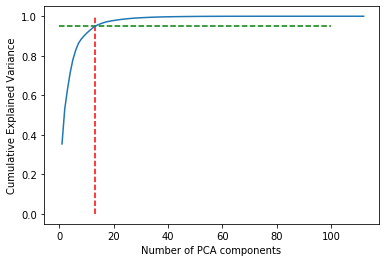

In [102]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [103]:
colnames = X.columns
attributes_pca =  pd.DataFrame(pca.components_)
attributes_pca = attributes_pca.loc[:,0:12]
attributes_pca['Attribute'] = colnames
attributes_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','Attribute']
attributes_pca.set_index("Attribute", inplace = True) 
attributes_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Attribute,,,,,,,,,,,,,
onnet_mou_6,0.107248,0.122246,0.111593,0.143008,0.161839,0.147696,0.001167,0.000535,0.001044,0.002682,0.001395,0.002494,0.021792
onnet_mou_7,-0.056860,-0.050610,-0.021800,-0.008083,0.004488,0.037564,0.001249,0.000756,0.001007,0.000649,-0.000106,0.000768,0.012687
onnet_mou_8,0.081320,0.108988,0.079146,-0.083415,-0.055397,-0.065320,0.002534,0.002304,0.002512,0.007270,0.005838,0.006100,-0.070364
offnet_mou_6,-0.061439,-0.100867,-0.107032,0.017340,-0.035144,-0.059444,0.003538,0.004820,0.003964,0.006802,0.008055,0.006544,-0.001467
offnet_mou_7,0.142788,-0.002120,-0.080466,0.190857,-0.022680,-0.130408,-0.005444,0.000650,0.002129,-0.009023,0.002515,0.003370,0.025475
offnet_mou_8,0.316669,0.329252,0.277715,-0.331844,-0.386207,-0.286824,-0.001291,-0.000655,-0.000857,-0.002310,-0.001071,-0.001420,0.055221
roam_ic_mou_6,-0.016752,0.119612,-0.065140,-0.083824,0.116683,-0.146963,-0.001314,-0.002388,0.002552,-0.003319,-0.002454,0.004032,0.003835
roam_ic_mou_7,0.058189,-0.021283,-0.044472,0.070365,-0.025780,-0.054749,-0.007926,0.001207,0.003462,-0.013560,0.003025,0.005682,0.012090
roam_ic_mou_8,0.052407,-0.088990,0.057855,0.062149,-0.119777,0.084278,-0.007045,0.006923,-0.002489,-0.010684,0.010223,-0.003964,0.009675


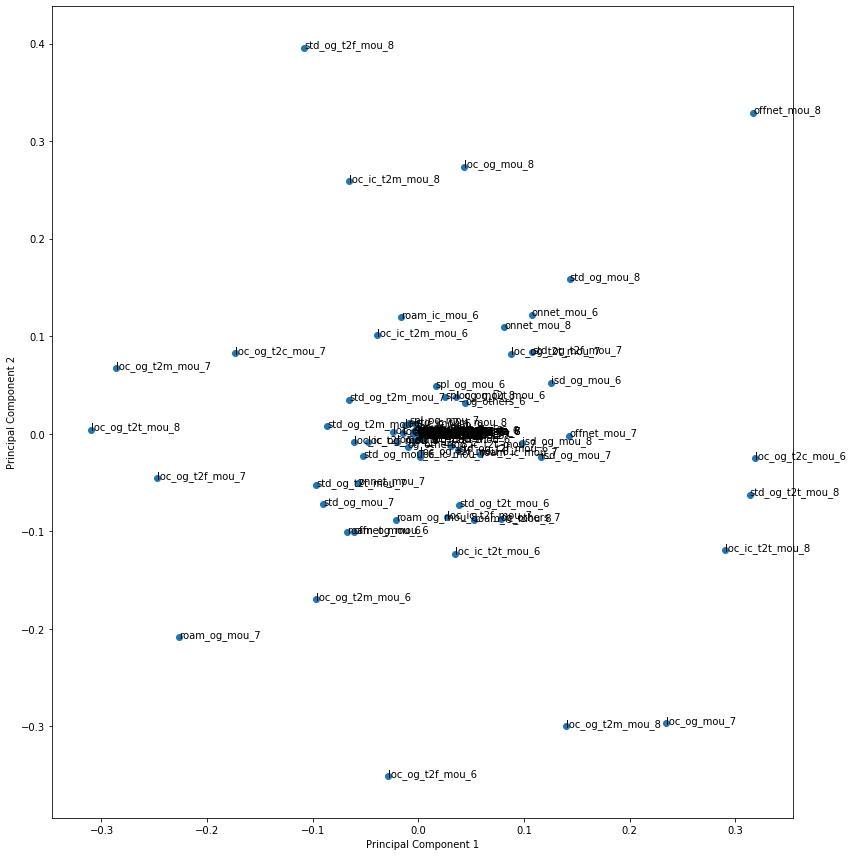

In [104]:
#Let's visualise the first 2 components how it explains the varibles since it explains more than 50 percent of the variance

fig = plt.figure(figsize = (12,12))
plt.scatter(attributes_pca.PC1, attributes_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(attributes_pca.index):
    plt.annotate(txt, (attributes_pca.PC1[i],attributes_pca.PC2[i]))
plt.tight_layout()
plt.show()

In [106]:
# Incremental PCA

In [105]:
pca_final = IncrementalPCA(n_components=13)

In [107]:
df_final = pca_final.fit_transform(X)

In [108]:
attributes_pca_2 = pd.DataFrame(df_final , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13'])

In [109]:
attributes_pca_2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1460.655841,-588.205203,137.972505,654.871110,-238.184493,-14.652098,-45.395313,-41.267202,-73.097388,-4.322651,-45.673633,45.476973,4.368960
1,1422.019998,1431.239191,-195.449009,1561.192324,-578.337852,-82.975509,-1066.850193,-483.393768,-672.690034,-1013.301274,57.412102,1145.653332,24.271685
2,-946.954870,-231.070786,125.702165,117.260833,162.892707,-266.012070,427.705934,-179.570532,627.730653,347.367609,55.147732,582.224256,289.564881
3,-487.049305,-654.513208,-516.127534,454.039890,-26.588669,-4.250562,14.648946,36.495837,-49.957894,68.868919,-139.039694,-24.747406,-5.709625
4,1218.804714,-644.851134,455.994423,-304.767160,-247.731326,1066.279861,-315.784814,40.593210,102.449416,9.496208,-45.615328,-63.770383,15.630227


In [110]:
pca_final.explained_variance_ratio_

array([0.35406554, 0.17588443, 0.09895451, 0.08505318, 0.06616104,
       0.04707076, 0.03413141, 0.02165675, 0.01617848, 0.01399981,
       0.01280689, 0.01152257, 0.01071338])

In [111]:
# Dump components relations with features:
results = pd.DataFrame(pca_final.components_,columns=colnames,index = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13'])

results.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,MOU_usage_6,MOU_usage_7,MOU_usage_8,DATA_usage_6,DATA_usage_7,DATA_usage_8,aon_months,fb_user_6,fb_user_7,fb_user_8,cluster_id
PC1,0.107243,0.122247,0.111596,0.143015,0.161840,0.147694,0.001168,0.000535,0.001044,0.002683,0.001396,0.002495,0.021788,0.025362,0.023973,0.037321,0.042187,0.039787,0.000652,0.000733,0.000692,0.000097,0.000134,0.000171,0.062826,0.072345,0.067703,0.070917,0.081543,0.073179,0.078436,0.090566,0.080240,0.000122,0.000141,0.000139,0.171391,0.199253,0.175298,0.000207,0.000242,0.000276,0.000622,0.001070,0.001229,0.000080,0.000001,0.000002,0.012283,0.014528,0.013720,0.023969,0.028502,0.026724,0.001015,0.001290,0.001144,0.037975,0.045353,0.042177,0.003754,0.004351,0.003940,0.006917,0.007895,0.007508,0.000160,0.000189,0.000161,0.011220,0.012864,0.011914,0.000004,-2.236413e-06,0.000001,0.000951,0.001395,0.001333,0.000122,0.000200,0.000168,0.232360,0.267214,0.274340,-0.000075,-0.000076,-6.198460e-05,-0.000346,-0.000340,-0.000244,-0.000076,-0.000074,-0.000062,-0.000099,-0.000102,-0.000084,-0.050245,-0.057128,-0.050991,-0.049375,-0.050180,-0.037846,0.341151,0.395571,0.366941,-0.195814,-0.196331,-0.162353,0.000217,0.000344,0.000330,2.234057e-04,-0.000090
PC2,-0.056860,-0.050611,-0.021809,-0.008086,0.004489,0.037576,0.001250,0.000757,0.001009,0.000650,-0.000104,0.000770,0.012685,0.015432,0.018916,0.030392,0.033194,0.039944,0.001599,0.001700,0.001681,0.000027,0.000049,0.000112,0.047412,0.054102,0.064011,-0.066502,-0.064360,-0.041166,-0.053822,-0.049140,-0.025698,0.000224,0.000255,0.000266,-0.140971,-0.132564,-0.077647,0.000892,0.000961,0.000966,0.000041,-0.000030,0.000387,-0.000038,0.000003,0.000003,0.009950,0.011649,0.013827,0.027073,0.030632,0.035506,0.003062,0.003419,0.003401,0.042435,0.048256,0.054883,-0.000620,-0.000249,0.000679,-0.000151,0.000581,0.002466,0.000497,0.000533,0.000568,-0.000225,0.000863,0.003884,-0.000003,-3.859513e-07,-0.000001,0.001545,0.001915,0.002014,0.000078,0.000127,0.000150,0.301375,0.369283,0.449084,0.000093,0.000102,1.004002e-04,0.000181,0.000203,0.000208,0.000168,0.000179,0.000189,0.000157,0.000187,0.000192,0.125647,0.128812,0.110032,0.074488,0.082052,0.080141,-0.037809,-0.003662,0.077962,0.345690,0.383948,0.376543,0.002419,-0.000481,-0.000502,-5.130526e-04,-0.000720
PC3,0.081285,0.109030,0.079239,-0.083344,-0.055406,-0.065382,0.002541,0.002308,0.002515,0.007280,0.005844,0.006105,-0.070349,-0.067797,-0.063133,-0.154326,-0.146169,-0.134732,-0.004467,-0.004420,-0.003956,0.000076,0.000237,0.000111,-0.246394,-0.237011,-0.21

## Model Prediction using PCA

### 1. K MEANS

In [112]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [113]:
hopkins(attributes_pca_2)

0.9799772219040443

In [114]:
#Let's check the silhouette score first to identify the ideal number of clusters
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(attributes_pca_2)
    sse_.append([k, silhouette_score(attributes_pca_2, kmeans.labels_)])

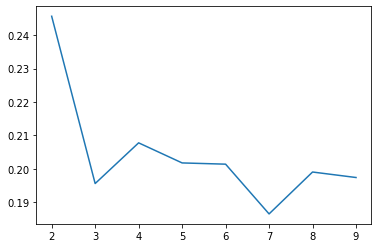

In [115]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

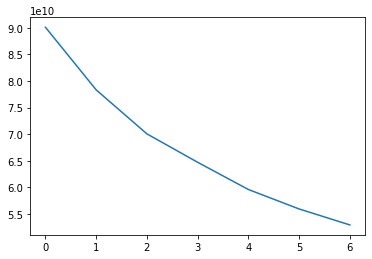

In [116]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(attributes_pca_2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [117]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(attributes_pca_2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(attributes_pca_2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.24564684840050335
For n_clusters=3, the silhouette score is 0.1955357215503856
For n_clusters=4, the silhouette score is 0.20776954286807167
For n_clusters=5, the silhouette score is 0.20170331845477976
For n_clusters=6, the silhouette score is 0.20150782123878508
For n_clusters=7, the silhouette score is 0.202207790370758
For n_clusters=8, the silhouette score is 0.19481134234914915


In [118]:
#No distinct elbow ut the silhouette score raises after 4  Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=5 clusters
model_cluster = KMeans(n_clusters = 4, max_iter=500)
model_cluster.fit(attributes_pca_2)

KMeans(max_iter=500, n_clusters=4)

In [119]:

df_cluster = pd.concat([attributes_pca_2, pd.Series(model_cluster.labels_)], axis=1)
df_cluster.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','PC11', 'PC12','PC13','cluster_id']

df_cluster.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,cluster_id
0,-1460.655841,-588.205203,137.972505,654.871110,-238.184493,-14.652098,-45.395313,-41.267202,-73.097388,-4.322651,-45.673633,45.476973,4.368960,3
1,1422.019998,1431.239191,-195.449009,1561.192324,-578.337852,-82.975509,-1066.850193,-483.393768,-672.690034,-1013.301274,57.412102,1145.653332,24.271685,0
2,-946.954870,-231.070786,125.702165,117.260833,162.892707,-266.012070,427.705934,-179.570532,627.730653,347.367609,55.147732,582.224256,289.564881,3
3,-487.049305,-654.513208,-516.127534,454.039890,-26.588669,-4.250562,14.648946,36.495837,-49.957894,68.868919,-139.039694,-24.747406,-5.709625,3
4,1218.804714,-644.851134,455.994423,-304.767160,-247.731326,1066.279861,-315.784814,40.593210,102.449416,9.496208,-45.615328,-63.770383,15.630227,2


In [120]:

df_cluster.cluster_id.value_counts()

3    10905
1     7303
2     6898
0     4843
Name: cluster_id, dtype: int64

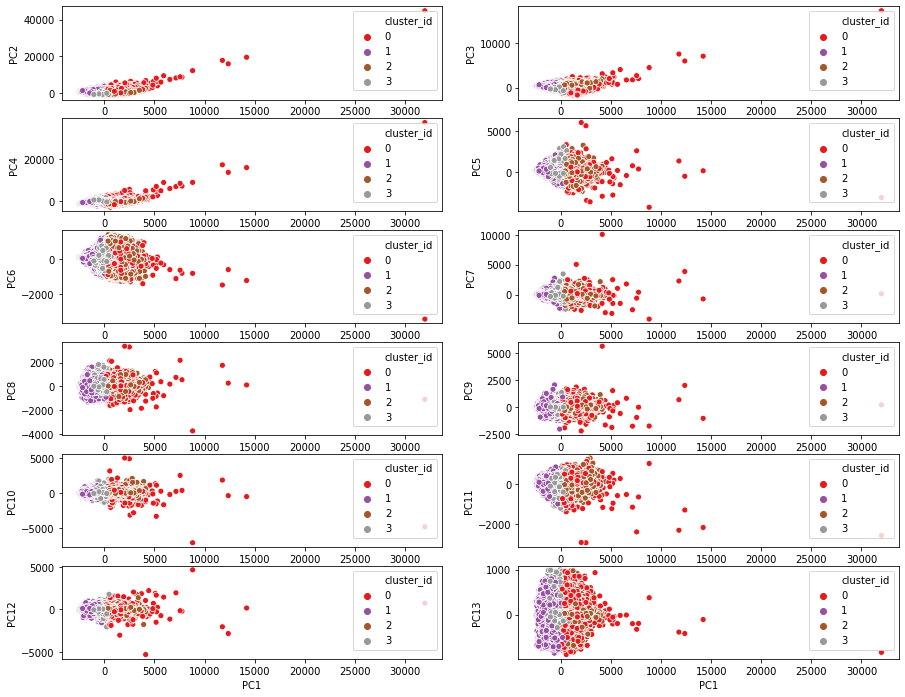

In [121]:
fig, axes = plt.subplots(6,2, figsize=(15,12))
sns.scatterplot(x = 'PC1', y = 'PC2',hue='cluster_id',data = df_cluster,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'PC1', y = 'PC3',hue='cluster_id', data = df_cluster,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'PC1', y = 'PC4',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[1][0])
sns.scatterplot(x = 'PC1', y = 'PC5',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[1][1])
sns.scatterplot(x = 'PC1', y = 'PC6',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[2][0])
sns.scatterplot(x = 'PC1', y = 'PC7',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[2][1])
sns.scatterplot(x = 'PC1', y = 'PC8',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[3][0])
sns.scatterplot(x = 'PC1', y = 'PC9',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[3][1])
sns.scatterplot(x = 'PC1', y = 'PC10',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[4][0])
sns.scatterplot(x = 'PC1', y = 'PC11',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[4][1])
sns.scatterplot(x = 'PC1', y = 'PC12',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[5][0])
sns.scatterplot(x = 'PC1', y = 'PC13',hue='cluster_id', data= df_cluster,legend='full',palette="Set1",ax=axes[5][1])



In [122]:
churn_data['cluster_id'] = model_cluster.labels_

#print(churn_data.columns.tolist())

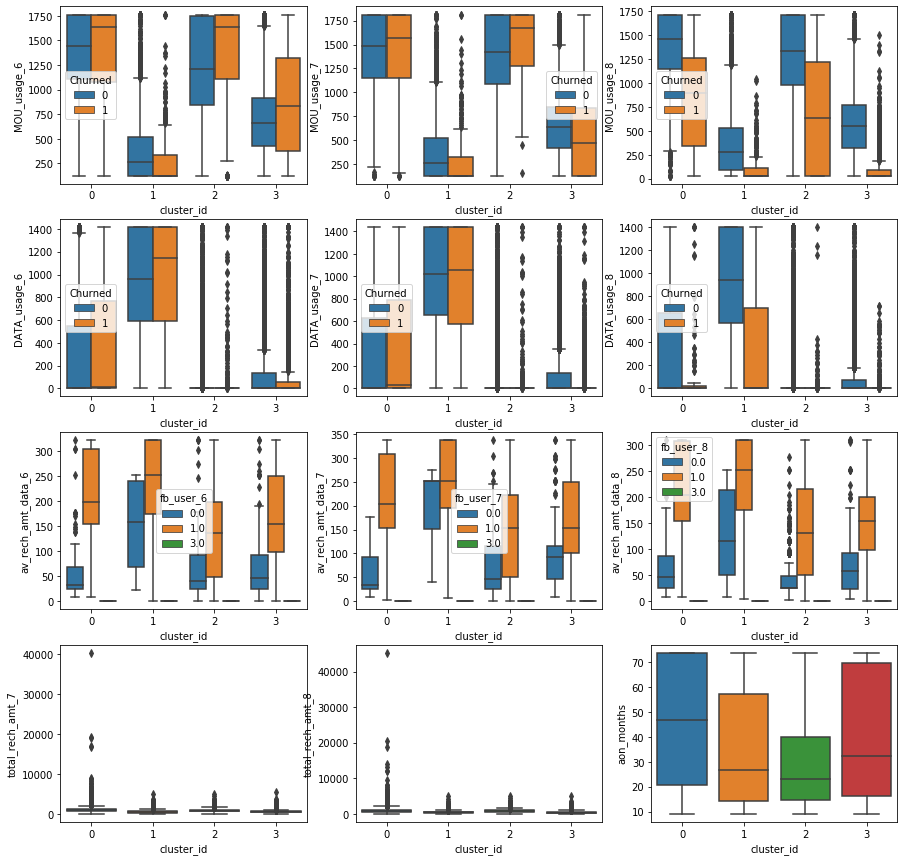

In [123]:
fig, axes = plt.subplots(4,3, figsize=(15,15))

sns.boxplot(x = 'cluster_id', y = 'MOU_usage_6', hue = 'Churned', data = churn_data,ax=axes[0][0])
sns.boxplot(x = 'cluster_id', y = 'MOU_usage_7', hue = 'Churned', data = churn_data,ax=axes[0][1])
sns.boxplot(x = 'cluster_id', y = 'MOU_usage_8', hue = 'Churned', data = churn_data,ax=axes[0][2])
sns.boxplot(x = 'cluster_id', y = 'DATA_usage_6', hue = 'Churned', data= churn_data,ax=axes[1][0])
sns.boxplot(x = 'cluster_id', y = 'DATA_usage_7', hue = 'Churned', data= churn_data,ax=axes[1][1])
sns.boxplot(x = 'cluster_id', y = 'DATA_usage_8', hue = 'Churned', data= churn_data,ax=axes[1][2])
sns.boxplot(x = 'cluster_id', y = 'av_rech_amt_data_6', hue = 'fb_user_6',data= churn_data,ax=axes[2][0])
sns.boxplot(x = 'cluster_id', y = 'av_rech_amt_data_7', hue = 'fb_user_7',data= churn_data,ax=axes[2][1])
sns.boxplot(x = 'cluster_id', y = 'av_rech_amt_data_8', hue = 'fb_user_8',data= churn_data,ax=axes[2][2])
sns.boxplot(x = 'cluster_id', y = 'total_rech_amt_7', data= churn_data,ax=axes[3][0])
sns.boxplot(x = 'cluster_id', y = 'total_rech_amt_8', data= churn_data,ax=axes[3][1])
sns.boxplot(x = 'cluster_id', y = 'aon_months', data= churn_data,ax=axes[3][2])


In [124]:
#Using PCA 

pca_data = pd.DataFrame(df_final)
# Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(pca_data,y,test_size=0.3)


In [125]:
# ROC and AUC
def roc_cure_plot(model):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(4,4))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic(ROC) \n The AUC value is: {:2f}'.format(logit_roc_auc))
    plt.legend(loc="lower right")
    plt.show()

###  2.1) Logistic Regression with default on PCA data

No handles with labels found to put in legend.


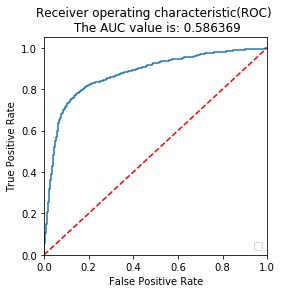

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8258
           1       0.56      0.19      0.28       727

    accuracy                           0.92      8985
   macro avg       0.75      0.59      0.62      8985
weighted avg       0.90      0.92      0.90      8985

Accuracy TRAIN: 0.921628
Accuracy TEST: 0.922204
Confusion Matrix : 
[[8151  107]
 [ 592  135]]


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

pca_lr_model1 = LogisticRegression().fit(X_train,y_train)
y_pred = pca_lr_model1.predict(X_test)

# Metrics
roc_cure_plot(pca_lr_model1)

# Getting key metrics
print(classification_report(y_test, y_pred))
print('Accuracy TRAIN: {:2f}'.format(pca_lr_model1.score(X_train,y_train)))
print('Accuracy TEST: {:2f}'.format(pca_lr_model1.score(X_test,y_test)))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

    The accuracy looks good but recall and precision is poor
    Generally it is poor prediction

### 2.2) Regularized Logistic Regression with PCA grid search and class_weight 'balanced'

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits=10,shuffle=True,random_state=42)
params = {'penalty': ['l1', 'l2'],'C':[0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 40, 80 ]}

pca_lr_model2=LogisticRegression()
pca_lr_model2_cv=GridSearchCV(pca_lr_model2,cv=folds,param_grid=params)
pca_lr_model2_cv.fit(X_train,y_train)

print("Tuned hpyerparameters :(best parameters) ",pca_lr_model2_cv.best_params_)
print("Accuracy :",pca_lr_model2_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 1e-05, 'penalty': 'l2'}
Accuracy : 0.9217228037509054


No handles with labels found to put in legend.


score 0.8175848636616583


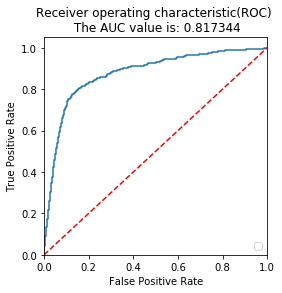

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8258
           1       0.28      0.82      0.42       727

    accuracy                           0.82      8985
   macro avg       0.63      0.82      0.66      8985
weighted avg       0.92      0.82      0.85      8985

Accuracy of LR classifier on training set: 0.820454
Accuracy of LR classifier on test set: 0.817585


In [128]:
pca_lr_model2=LogisticRegression(class_weight =  {0: .09, 1: 0.95},C=0.00001,penalty="l2")
pca_lr_model2.fit(X_train,y_train)
y_pred = pca_lr_model2.predict(X_test)

# Getting key metrics
print("score",pca_lr_model2.score(X_test,y_test))
roc_cure_plot(pca_lr_model2)
print(classification_report(y_test, y_pred))
print('Accuracy of LR classifier on training set: {:2f}'.format(pca_lr_model2.score(X_train,y_train)))
print('Accuracy of LR classifier on test set: {:2f}'.format(pca_lr_model2.score(X_test,y_test)))

    The performance metrics is better LR with default parameters
    Recall is 0.82 but precision is 0.28.
    Accuracy is 0.82 with ROC AUC of 0.817

### 3.1. Random Forest basic model

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8258
           1       0.36      0.75      0.49       727

    accuracy                           0.87      8985
   macro avg       0.67      0.82      0.71      8985
weighted avg       0.93      0.87      0.89      8985

Accuracy of Random Forest Classifier on training set: 0.886424
Accuracy of Random Forest Classifier on test set: 0.872565


No handles with labels found to put in legend.


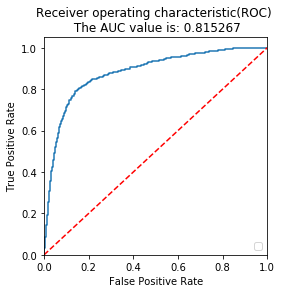

In [129]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

# Set parameter 'max_features': ['auto', 'sqrt']
pca_rf_model3=RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',max_depth=7, min_samples_leaf = 1, min_samples_split =12)

# Fit the model
pca_rf_model3.fit(X_train, y_train)

# Predict
y_pred = pca_rf_model3.predict(X_test)

# Getting key metrics
print(classification_report(y_test, y_pred))

print('Accuracy of Random Forest Classifier on training set: {:2f}'.format(pca_rf_model3.score(X_train,y_train)))
print('Accuracy of Random Forest Classifier on test set: {:2f}'.format(pca_rf_model3.score(X_test,y_test)))

# Plotting ROC curve
roc_cure_plot(pca_rf_model3)

    The performance metrics is poor than Regularized and Tuned LR
    Recall is 0.82 but precision is 0.36 which is better.
    Accuracy is 0.87 better than Regularized and Tuned LR and the ROC AUC is 0.815

### 3.2.Random Forest with Hyperparameter Tuning with class_weight 'balanced'

In [131]:
# Running the random forest with following grid search.
# It will take around 40 miniutes

grid = {
    'bootstrap': [True],
    'max_depth': [90,120],
    'max_features': [3,4],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [2,4,8],
    'n_estimators': [100,200]
}

# Initializing RF
pca_rf_model4 = RandomForestRegressor(random_state=0)

# Grid search
grid = GridSearchCV(estimator = pca_rf_model4, param_grid = grid, 
                          cv = None, n_jobs = -1, verbose = 2)

# Fit the model
grid.fit(X_train, y_train)

# Get best parameters
print(grid.best_params_)

# Model performance
best_grid = grid.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 20.1min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


In [132]:
best_grid

RandomForestRegressor(max_depth=90, max_features=4, min_samples_leaf=5,
                      n_estimators=200, random_state=0)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8258
           1       0.49      0.54      0.51       727

    accuracy                           0.92      8985
   macro avg       0.72      0.74      0.73      8985
weighted avg       0.92      0.92      0.92      8985

Accuracy of Random Forest Classifier on training set: 0.974814
Accuracy of Random Forest Classifier on test set: 0.916639


No handles with labels found to put in legend.


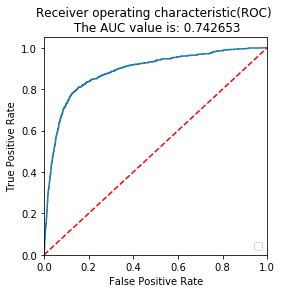

In [133]:
pca_rf_model5=RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',
                                     max_depth=90,max_features=4, min_samples_leaf = 5, min_samples_split=2,
                                     n_estimators=200,random_state=0)

# Fit the model
pca_rf_model5.fit(X_train, y_train)

# Predict
y_pred = pca_rf_model5.predict(X_test)

# Getting key metrics
print(classification_report(y_test, y_pred))

print('Accuracy of Random Forest Classifier on training set: {:2f}'.format(pca_rf_model5.score(X_train,y_train)))
print('Accuracy of Random Forest Classifier on test set: {:2f}'.format(pca_rf_model5.score(X_test,y_test)))

# Plotting ROC curve
roc_cure_plot(pca_rf_model5)

    The performance metrics is poorer than LR
    Recall is 0.73 but precision is 0.72 .
    Accuracy is 0.92 better than Regularized and Tuned LR and the ROC AUC is 0.74

In [134]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7847  411]
 [ 338  389]]


### 4. Decision tree basic model 

In [135]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(class_weight='balanced')
dt_default.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced')

In [136]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [137]:
# Let's check the report of our default model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8258
           1       0.49      0.54      0.51       727

    accuracy                           0.92      8985
   macro avg       0.72      0.74      0.73      8985
weighted avg       0.92      0.92      0.92      8985



In [138]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7847  411]
 [ 338  389]]


In [139]:
print(accuracy_score(y_test,y_pred))

0.9166388425153033


    The performance metrics is similar to RF but a bit better
    Recall is 0.74 but precision is 0.72 .
    Accuracy is 0.92

## INTREPRETABLE MODELS 

In [140]:
## Splitting into traing and test

X=churn_data.drop('Churned',axis=1)
y=churn_data.Churned

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100, stratify = y)

# Extracting column types
num_columns =numeric_columns = X.select_dtypes(exclude = 'category')
num_columns = num_columns.columns.tolist()

# import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Apply MinMaxScaler
scaler = StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_test[num_columns] = scaler.fit_transform(X_test[num_columns])

X_train.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,MOU_usage_6,MOU_usage_7,MOU_usage_8,DATA_usage_6,DATA_usage_7,DATA_usage_8,aon_months,fb_user_6,fb_user_7,fb_user_8,cluster_id
16167,-0.733285,-0.858097,-0.813097,-0.847989,-1.156719,-1.104649,-0.366462,-0.326604,-0.329470,-0.383405,-0.355341,-0.344661,-0.611875,-0.741490,-0.720564,-0.715458,-1.034299,-0.984490,-0.556853,-0.561851,-0.555502,-0.421605,1.402183,-0.423974,-0.735390,-1.056632,-1.005006,-0.602192,-0.602850,-0.560703,-0.645994,-0.660053,-0.618018,-0.304276,-0.299337,-0.296318,-0.756736,-0.789638,-0.723808,-0.15309,-0.157254,-0.138847,-0.590352,-0.015811,-0.599867,-0.459638,-0.057403,-0.062895,-0.587470,-0.840601,-0.825990,-0.614394,-1.115687,-1.083077,-0.563108,-0.609659,-0.611287,-0.618871,-1.163958,-1.131622,-0.489548,-0.488202,-0.473567,-0.566806,-0.629437,-0.597243,-0.342297,-0.349145,-0.337183,-0.579928,-0.695301,-0.664608,-0.495788,-0.235912,-0.290618,-0.319048,-0.328733,-0.321667,-0.277854,-0.288232,-0.28382,-1.012492,-0.561299,-0.582105,2.326579,2.288949,-0.400595,-0.338215,-0.353681,-0.353302,-0.42654,2.345307,2.451332,-0.19223,-0.186159,-0.166039,1.969800,2.436291,2.476388,0.464780,1.884506,1.420453,-1.325021,-1.334412,-1.313519,0.759989,1.161647,0.424680,-0.831304,1.0,1.0,1.0,-0.728396
3498,2.130016,1.920964,1.724630,0.205034,0.479672,0.407812,-0.366462,-0.326604,-0.329470,-0.383405,-0.355341,-0.344661,-0.433147,-0.651537,-0.643790,0.032019,-0.042161,-0.177534,-0.556853,-0.533750,-0.555502,-0.421605,0.562787,2.023880,-0.228690,-0.376562,-0.449785,2.356318,2.337446,2.508080,0.531136,0.897247,0.972876,0.182717,2.321743,-0.296318,1.926065,1.921173,1.868321,-0.15309,-0.157254,-0.138847,0.341554,-0.083178,0.687686,1.608030,-0.057403,-0.062895,-0.260931,-0.517036,-0.562719,-0.189033,-0.433481,-0.527855,-0.509596,-0.560744,-0.190420,-0.319588,-0.586131,-0.621133,2.361474,0.254167,3.947889,-0.217308,-0.596096,-0.593991,-0.342297,-0.349145,-0.337183,0.770170,-0.362205,2.360658,-0.495788,-0.235912,-0.290618,-0.319048,-0.328733,-0.321667,-0.277854,-0.288232,-0.28382,1.923465,1.160854,1.461573,-0.429816,-0.436882,-0.400595,0.578086,0.067362,0.094878,-0.42654,-0.426383,-0.407942,-0.19223,-0.186159,-0.166039,-0.537225,-0.540175,-0.518123,0.813131,-0.040553,0.078971,1.648376,0.759024,0.820018,-0.291635,-0.307242,-0.270787,0.542051,1.0,1.0,1.0,0.180214
19790,2.130016,2.147759,-0.675402,0.471253,-0.818025,-0.764154,-0.366462,-0.326604,-0.329470,-0.383405,-0.355341,-0.344661,-0.156548,-0.647607,-0.587075,-0.234228,-0.626282,-0.684488,-0.556853,-0.561851,

### 1) LOGISTIC REGRESSION

In [141]:
# Common functions

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import classification_report,precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import average_precision_score

# Plotting feature importance
def feature_importance(features):
    plt.figure(figsize=(20,5),dpi=500)
    plt.bar([x for x in range(len(features))], features)
    plt.title('Plotting Feature Importance',fontsize=20)
    plt.show(block=False)    
    
def feature_importance(columns,model):
    feature_importance=pd.DataFrame(np.hstack((np.array([columns]).T, model.coef_.T)), columns=['Feature', 'Importance'])
    feature_importance['Importance']=pd.to_numeric(feature_importance['Importance'])
    feature_importance['Importance_abs_value']=np.abs(feature_importance['Importance']) 
    return feature_importance.sort_values(by='Importance_abs_value', ascending=False)
    
def PR_auc(y_test,y_pred):
    precision, recall, thres = metrics.precision_recall_curve(y_test, y_pred)
    auc_score=auc(recall,precision)
    print('Precision/Recall AUC: %.3f' % auc_score)
    
def PR_auc_val(y_test,y_pred):
    precision, recall, thres = metrics.precision_recall_curve(y_test, y_pred)
    auc_score=auc(recall,precision)
    return auc_score

####  1.1. Logistic Regression with penanlty 12 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8250
           1       0.66      0.26      0.38       735

    accuracy                           0.93      8985
   macro avg       0.80      0.62      0.67      8985
weighted avg       0.92      0.93      0.91      8985

Accuracy of LR classifier on training set: 0.934745
Accuracy of LR classifier on test set: 0.928770
[[8153   97]
 [ 543  192]]


No handles with labels found to put in legend.


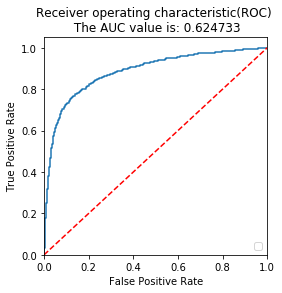

Precision/Recall AUC: 0.493


In [142]:
lg_model2 = LogisticRegression(penalty = 'l2')
lg_model2.fit(X_train , y_train)

y_pred = lg_model2.predict(X_test)

# Getting key metrics
print(classification_report(y_test, y_pred))
print('Accuracy of LR classifier on training set: {:2f}'.format(lg_model2.score(X_train,y_train)))
print('Accuracy of LR classifier on test set: {:2f}'.format(lg_model2.score(X_test,y_test)))

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

# Plotting ROC curve
roc_cure_plot(lg_model2)


# Precision and Recall AUC
PR_auc(y_test,y_pred)

df_LR=pd.DataFrame()
df_LR['variable']=X.columns
df_LR['coef-LR DEFAULT']=lg_model2.coef_.T
df_LR=df_LR.set_index('variable')

In [143]:

df_LR.sort_values(by=['coef-LR DEFAULT'], ascending=False).head(20)


,coef-LR DEFAULT
variable,
loc_ic_mou_8,2.308678
loc_og_mou_8,1.540028
std_og_mou_8,1.228483
MOU_usage_7,0.540443
std_ic_mou_8,0.418179
std_ic_mou_6,0.305767
loc_ic_t2m_mou_7,0.275656
loc_og_t2t_mou_7,0.272512
loc_ic_t2m_mou_6,0.251373


In [144]:
df_LR.sort_values(by=['coef-LR DEFAULT'], ascending=False).tail(20)


,coef-LR DEFAULT
variable,
loc_ic_mou_6,-0.272784
aon_months,-0.290489
std_og_t2m_mou_8,-0.322827
DATA_usage_8,-0.345455
sachet_2g_8,-0.366180
av_rech_amt_data_8,-0.405585
loc_ic_mou_7,-0.423396
std_ic_t2m_mou_8,-0.442678
total_rech_amt_8,-0.467684


### 1.2. Logistic Regression with class_weight of "balanced"

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8250
           1       0.30      0.82      0.43       735

    accuracy                           0.83      8985
   macro avg       0.64      0.82      0.67      8985
weighted avg       0.92      0.83      0.86      8985

Accuracy of LR classifier on training set: 0.826417
Accuracy of LR classifier on test set: 0.825487
[[6817 1433]
 [ 135  600]]


No handles with labels found to put in legend.


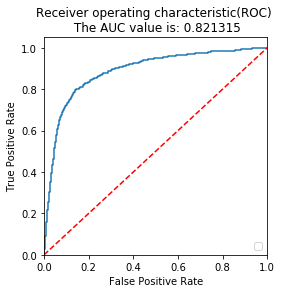

Precision/Recall AUC: 0.563


In [145]:
lg_model4 = LogisticRegression(class_weight = "balanced")
lg_model4.fit(X_train , y_train)

y_pred = lg_model4.predict(X_test)

# Getting key metrics
print(classification_report(y_test, y_pred))
print('Accuracy of LR classifier on training set: {:2f}'.format(lg_model4.score(X_train,y_train)))
print('Accuracy of LR classifier on test set: {:2f}'.format(lg_model4.score(X_test,y_test)))

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

# Plotting ROC curve
roc_cure_plot(lg_model4)

# Precision and Recall AUC
PR_auc(y_test,y_pred)


df_LR=pd.DataFrame()
df_LR['variable']=X.columns
df_LR['coef-LR BALANCED']=lg_model4.coef_.T
df_LR=df_LR.set_index('variable')

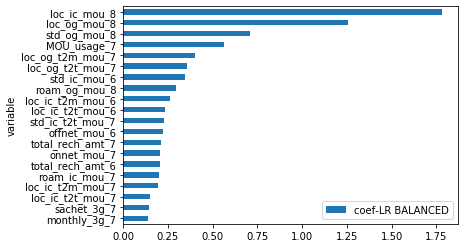

In [146]:
df_LR.sort_values(by=['coef-LR BALANCED'], ascending=True)[-20:].plot(kind = 'barh')

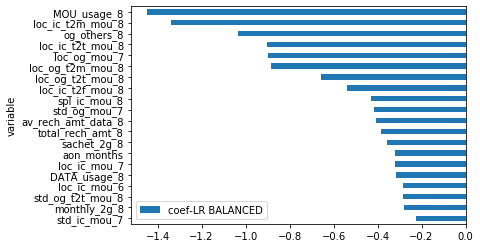

In [147]:
df_LR.sort_values(by=['coef-LR BALANCED'], ascending=False)[-20:].plot(kind = 'barh')

### 1.3. Logistic Regression with class_weight of " {0: .09, 1: 0.95}"

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8250
           1       0.30      0.81      0.44       735

    accuracy                           0.83      8985
   macro avg       0.64      0.82      0.67      8985
weighted avg       0.92      0.83      0.86      8985

Accuracy of LR classifier on training set: 0.834430
Accuracy of LR classifier on test set: 0.831720
[[6877 1373]
 [ 139  596]]


No handles with labels found to put in legend.


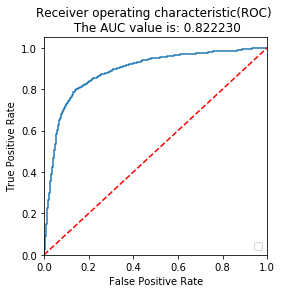

Precision/Recall AUC: 0.565



In [149]:
lg_model5 = LogisticRegression(class_weight = {0: .09, 1: 0.95})
lg_model5.fit(X_train , y_train)

y_pred = lg_model5.predict(X_test)

# Getting key metrics
print(classification_report(y_test, y_pred))
print('Accuracy of LR classifier on training set: {:2f}'.format(lg_model5.score(X_train,y_train)))
print('Accuracy of LR classifier on test set: {:2f}'.format(lg_model5.score(X_test,y_test)))

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

# Plotting ROC curve
roc_cure_plot(lg_model5)

# Precision and Recall AUC
PR_auc(y_test,y_pred)
print()

df_LR=pd.DataFrame()
df_LR['variable']=X.columns
df_LR['coef-LR with CLASS WEIGHT']=lg_model5.coef_.T
df_LR=df_LR.set_index('variable')

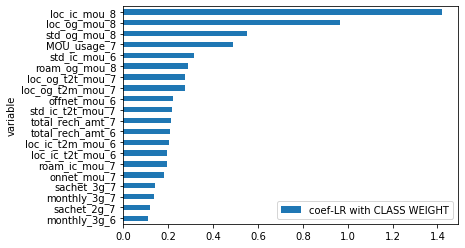

In [150]:
df_LR.sort_values(by=['coef-LR with CLASS WEIGHT'], ascending=True)[-20:].plot(kind = 'barh')

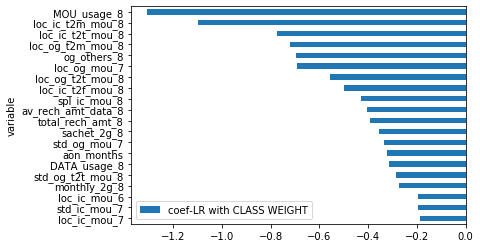

In [151]:
df_LR.sort_values(by=['coef-LR with CLASS WEIGHT'], ascending=False)[-20:].plot(kind = 'barh')

### 2. RFE On the best Logistic regression model the last one with CLASS WEIGHTS

In [152]:
from sklearn.feature_selection import RFE
# RFE with default parameters
rfe = RFE(lg_model5,15)             
rfe = rfe.fit(X_train, y_train)

In [153]:
col = X.columns[rfe.support_]
print( 'TOP 15 RFE COLUMNS = ', col)
X_train_rfe = X_train[col]

X_train_rfe.shape

TOP 15 RFE COLUMNS =  Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_6',
       'av_rech_amt_data_8', 'MOU_usage_7', 'MOU_usage_8', 'aon_months'],
      dtype='object')


(20964, 15)

### 3. SVM  with and without smote  

In [155]:
# Balancing DataSet
from imblearn.over_sampling import SMOTE

smote = SMOTE(kind = "regular")
X_smote_train,y_smote_train = smote.fit_sample(X_train,y_train)


In [623]:
print("X_smote_train Shape", X_smote_train.shape)
print("y_smote_train Shape", y_smote_train.shape)

imb = (y_smote_train != 0).sum()/(y_smote_train == 0).sum()
print("smote Train Data : ",imb)

X_smote_train Shape (38496, 113)
y_smote_train Shape (38496,)
smote Train Data :  1.0


### SVM without smote 

In [624]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l2", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_SVC = model.transform(X_train)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_SVC.shape)
print(pos)


(20964, 45)
[  3   4   5   8  11  14  15  16  17  24  25  29  32  38  44  50  53  56
  59  61  62  65  69  74  76  77  81  82  83  84  86  89  95  96  99 100
 101 102 103 104 107 108 109 110 111]


In [157]:
#feature vector for decision tree
SVC_features = list(X_train.columns[pos])
print("Features for SVC model buidling: ", SVC_features)

In [626]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc1 = LinearSVC(C=0.001, penalty="l2", dual=False).fit(X_smote_train, y_smote_train)
model = SelectFromModel(lsvc1, prefit=True)
X_SVC_smote = model.transform(X_smote_train)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_SVC_smote.shape)
print(pos)


(38496, 41)
[  1   2   3   4   5   7   8  10  11  14  15  17  24  25  26  28  29  30
  47  50  53  56  59  61  65  69  74  81  82  83  84  86  89  95  96 100
 101 103 104 107 108]


In [627]:
#feature vector for decision tree
SVC_features_smote = list(X_train.columns[pos])
print("Features for SVN model buidling: ", SVC_features_smote)

Features for SVN model buidling:  ['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_8', 'std_ic_mou_6', 'spl_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_8', 'sachet_3g_8', 'aug_vbc_3g', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'MOU_usage_7', 'MOU_usage_8', 'DATA_usage_8', 'aon_months']


### Testing accuracies on both SVM Kernels 

In [158]:
# non-linear model
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC
# model
non_linear_model = SVC(kernel='rbf')
# fit
non_linear_model.fit(X_train, y_train)
# predict
y_pred = non_linear_model.predict(X_test)

In [629]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9287701725097385 

[[8174   76]
 [ 564  171]]


In [630]:
# non-linear model
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC
# model
non_linear_model = SVC(kernel='linear')
# fit
non_linear_model.fit(X_train, y_train)
# predict
y_pred = non_linear_model.predict(X_test)

In [631]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9236505286588759 

[[8235   15]
 [ 671   64]]


### RANDOM FORESTS

#### simple random forest without smote

In [159]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8250
           1       0.43      0.01      0.02       735

    accuracy                           0.92      8985
   macro avg       0.67      0.50      0.49      8985
weighted avg       0.88      0.92      0.88      8985

[[8242    8]
 [ 729    6]]


#### Random forest with smote

In [161]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced_subsample')

# fit
rfc.fit(X_smote_train,y_smote_train)

# Making predictions
predictions = rfc.predict(X_test)

# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

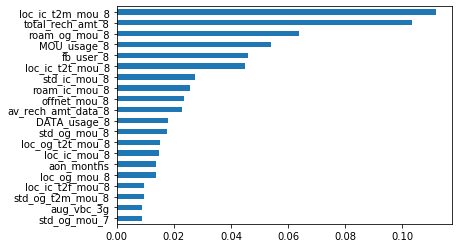

In [634]:
# feature importance from random forest with smote before hyper parameters

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-20:].plot(kind = 'barh')

### random forest hyper parameter tuning 'min_samples_leaf'

In [635]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced_subsample')


# fit tree on training data
parameters = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="recall")
parameters.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                   

In [636]:
# scores of GridSearch CV
best_grid = parameters.best_estimator_
print(best_grid)

predictions = parameters.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=60,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [637]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8250
           1       0.36      0.79      0.50       735

    accuracy                           0.87      8985
   macro avg       0.67      0.83      0.71      8985
weighted avg       0.93      0.87      0.89      8985



In [638]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7241 1009]
 [ 158  577]]


### random forest hyper parameter tuning 'max_depth'

In [661]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced_subsample')
# fit tree on training data
parameters = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="recall")
parameters.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                   

In [662]:
best_grid = parameters.best_estimator_
print(best_grid)
predictions = parameters.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [663]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8250
           1       0.42      0.70      0.53       735

    accuracy                           0.90      8985
   macro avg       0.70      0.81      0.74      8985
weighted avg       0.93      0.90      0.91      8985



In [664]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7550  700]
 [ 218  517]]


### random forest hyper parameter tuning 'n_estimators'

In [675]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV''
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(50, 70, 100)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight='balanced_subsample')
# fit tree on training data
parameters = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="recall")
parameters.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                   

In [676]:
best_grid = parameters.best_estimator_
print(best_grid)
predictions = parameters.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [677]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8250
           1       0.44      0.72      0.55       735

    accuracy                           0.90      8985
   macro avg       0.71      0.82      0.75      8985
weighted avg       0.93      0.90      0.91      8985



In [678]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7579  671]
 [ 207  528]]


### Random forest parameters after hyper tuning with SMOTE 

In [679]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Running the random forest with following grid search and penalty.
parameters = {
    'bootstrap': [True],
    'max_depth': [7,10,20],
    'max_features': [3,5,7],
    'min_samples_leaf': [50,100],
    'min_samples_split': [200,100],
    'n_estimators': [50,70]
}

# Initializing RF
pca_rf_model2 = RandomForestClassifier(class_weight='balanced_subsample')

# Grid search
grid = GridSearchCV(pca_rf_model2, parameters, 
                          cv = 7, n_jobs = -1, verbose = 2, scoring="recall")

# Fit the model
grid.fit(X_smote_train, y_smote_train)

# Get best parameters
print(grid.best_params_)

Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 10.5min finished


{'bootstrap': True, 'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 70}


In [681]:
 grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features=7,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [682]:
predictions = grid.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8250
           1       0.36      0.80      0.50       735

    accuracy                           0.87      8985
   macro avg       0.67      0.84      0.71      8985
weighted avg       0.93      0.87      0.89      8985



In [683]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))


[[7214 1036]
 [ 147  588]]


In [684]:
pca_rf_model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

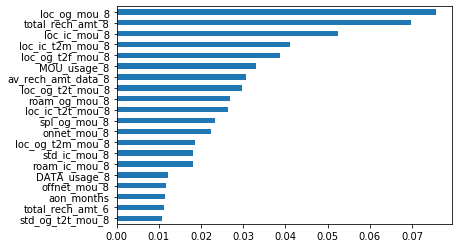

In [659]:
importances =  pca_rf_model2.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-20:].plot(kind = 'barh')

## FINAL ANALYSIS

    THE MOST IMPORTANT FACTOR IN THIS ANALYSIS WOULD BE THE IDENTIFICATION OF CHURNED CUSTOMERS. Therefore False positive records and true negatives are the two most important predictors for the success of a model. Let us compare the models based on this criterion. We will choose the attributes recoomended based on the value of 'recall'

### Models attempted with PCA 

#### PCA WITH CLUSTERING 

#### PCA WITH LOGISTIC REGRESSION

Comments : NOT an accurate  model since it fails to identify many churned customers . recall 18% 
    
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8220
           1       0.57      0.18      0.28       765

  

Accuracy TRAIN: 0.923106
Accuracy TEST: 0.918753
    
Confusion Matrix : 
[[8116  104]
 [ 626  139]]

#### PCA WITH SVM


Comments : NOT an accurate  model since it fails to identify many churned customers . recall 15% 
    
                precision    recall  f1-score   support

           0       0.93      0.99      0.96      8220
           1       0.55      0.15      0.23       765

 


Accuracy TRAIN: 0.922391
Accuracy TEST: 0.917307
Confusion Matrix : 
[[8130   90]
 [ 653  112]]

#### PCA WITH DECISION TREES

Comments : NOT an accurate model since it fails to identify many churned customers . recall 15% 

                precision    recall  f1-score   support

           0       0.93      0.99      0.96      8220
           1       0.55      0.15      0.23       765

[[8130   90]
 [ 653  112]]

### INTERPRETABLE MODELS

#### LOGISTIC REGRESSION MODELS 

####  Logistic Regression with penanlty 12 

               precision    recall  f1-score   support

           0       0.94      0.99      0.96      8250
           1       0.67      0.27      0.38       735



Accuracy of LR classifier on training set: 0.934984
Accuracy of LR classifier on test set: 0.929104
[[8151   99]
 [ 538  197]]

#### Logistic Regression with class_weight of "balanced"

THIS IS A GOOD MODEL WITH A RECALL RATE OF 81 %     
    
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8250
           1       0.30      0.81      0.43       735


Accuracy of LR classifier on training set: 0.826560

Accuracy of LR classifier on test set: 0.825710


[[6820 1430]
 [ 136  599]]
 

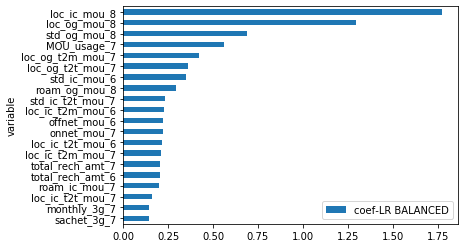


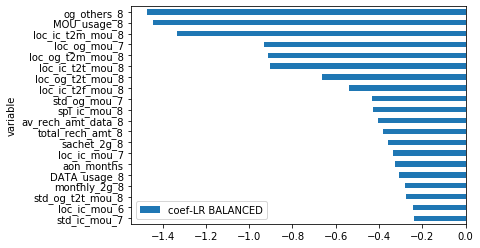

### Logistic Regression with class_weight of " {0: .09, 1: 0.95}"

THIS IS A GOOD MODEL WITH A RECALL RATE OF 81 %  

               precision    recall  f1-score   support

           0       0.98      0.83      0.90      8250
           1       0.30      0.81      0.44       735
 
Accuracy of LR classifier on training set: 0.834574
Accuracy of LR classifier on test set: 0.830829
    
[[6867 1383]
 [ 137  598]]
 
 
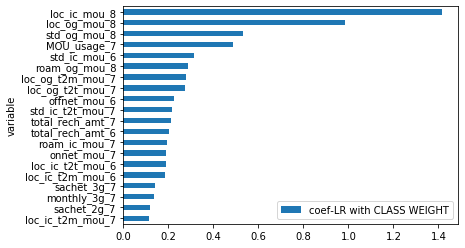



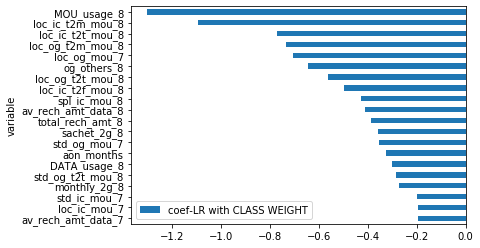

***TOP 15 RFE COLUMNS of best LOGISTIC REGRESSION MODEL ***

'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_7', 'loc_og_mou_8',
       'std_og_mou_7', 'std_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8',
       'av_rech_amt_data_8', 'MOU_usage_7', 'MOU_usage_8'

### SVM without smote ON BOTH KERNELS 

ALL SVM MODELS ARE EXTREMELY INACCURATE WE WIL NOT BE CONSIDERING THE RECOMMENDED PARAMETERS SINCE RECALL IS EXTREMELY LOW

*** 1) RBF KERNEL 
         accuracy: 0.9287701725097385 

   [[8174   76]
    [ 564  171]]

*** 2) LINEAR KERNEL 
          accuracy: 0.9236505286588759 

  [[8235   15]
    [ 671   64]]

### RANDOM FORESTS WITH SMOTE 

#### 1 ) PLAIN RANDOM FOREST NO SMOTE -  LOW RECALL


[[8200   50]
 [ 664   71]]

#### 2 ) PLAIN RANDOM FOREST WITH  SMOTE -  RESONABLE  RECALL 67%

                precision    recall  f1-score   support

           0       0.97      0.92      0.94      8250
           1       0.43      0.67      0.53       735


#### 3) random forest hyper parameter tuning 'min_samples_leaf' with smote - RECALL 79% 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8250
           1       0.36      0.79      0.50       735

#### 4) random forest hyper parameter tuning 'max_depth' - RECALL 70%

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8250
           1       0.42      0.70      0.53       735

#### 5) random forest hyper parameter tuning 'n_estimators' with smote - RECALL  72%

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8250
           1       0.44      0.72      0.55       735

#### 6) Random forest parameters after hyper tuning with SMOTE - recall 80%

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8250
           1       0.36      0.80      0.50       735

*** RECOMMENDED PARAMETERS DECISION TREE

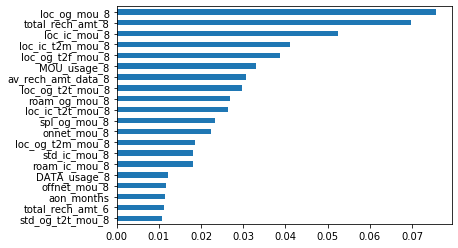
